## Prepare environment

In [0]:
# Common
import numpy as np
import matplotlib.pyplot as plt
# Visualizing intermediate activations
from tensorflow.keras.models import load_model
from tensorflow.keras import models




# For data processing
from os import listdir
from random import sample
import cv2
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # Setting Styles
import pandas as pd
# For model training
from random import uniform
import keras as keras
from keras.initializers import RandomNormal
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, AvgPool2D
from keras.layers import Conv2D, MaxPooling2D, MaxPool1D
from keras.utils import plot_model
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# For model evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import collections

import argparse
import numpy as np
import sys
import time
from PIL import Image
from keras.layers import (
        Input,
        InputLayer,
        BatchNormalization,
        Flatten,
        Activation,
        Dense)
from keras.layers import (
        Convolution2D,
        MaxPooling2D)
from keras.activations import *
from keras.models import Model
import keras.backend as K

In [0]:
!gdown # <HIDDEN LINK>   download CK+ dataset
!unzip '*.zip'

Downloading...
From: https://drive.google.com/uc?id=1eo8H7q8BcJP3z05Wr1qlZJW9mjoHMOoG
To: /content/CK+.zip
1.68GB [00:20, 83.7MB/s]
Archive:  CK+.zip
   creating: CK+/
   creating: CK+/Landmarks/
   creating: CK+/Landmarks/S111/
   creating: CK+/Landmarks/S111/007/
  inflating: CK+/Landmarks/S111/007/S111_007_00000008_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000002_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000011_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000006_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000001_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000005_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000012_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000013_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000004_landmarks.txt  
  inflating: CK+/Landmarks/S111/007/S111_007_00000007_landmarks.txt  
  inflating: CK+/Landmarks/S111/00

In [0]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2019-11-25 22:48:40--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.08s   

2019-11-25 22:48:40 (11.8 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



Constants:

In [0]:
FIGURES_DIR = '/content/figures/'
DATA_DIR = '/content/CK+/'
# FIGURES_DIR = '/content/drive/My Drive/EmotionalRecognition/figures/'
NUM_CLASSES = 8
RANDOM_STATE = 42
IMAGE_SIZE = (96, 96)

## Visualizing intermediate activations

Model summary

In [0]:
model = load_model('/content/last_cnn_model.h5')
model.summary()  # As a reminder.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 64)        1600      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 128)       204800    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 22, 128)       0         
_____________________________________________________

Input image for which filters are visualized

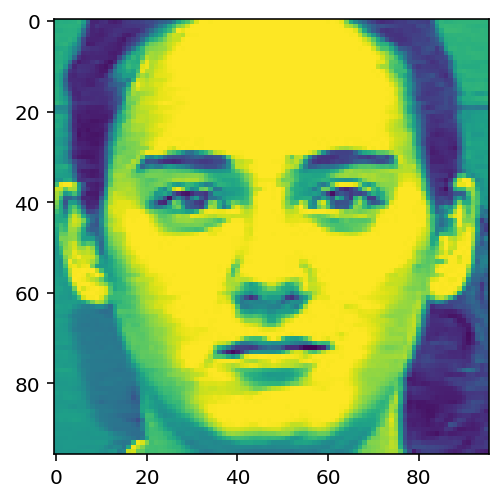

In [0]:
def get_emotion_label(seq_path):
    with open(seq_path, 'r') as file:
        label = int(float(file.read().strip()))
    return label


def extract_face(img_grey):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_grey, 1.1, 4)
    for (x, y, w, h) in faces:
        return img_grey[y:y + h, x:x + w]


def get_preprocessed_img(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_face = extract_face(img_gray)
    img_face = cv2.resize(img_face, IMAGE_SIZE)
    img_face = img_face.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
    return img_face

x_own=[]
for img_path in glob.glob('/content/data/*'):
  try:
    x_own.append(get_preprocessed_img(img_path))
  except Exception:
    print(str(Exception.with_traceback()))
x_own = np.array(x_own) / 255.
img_tensor =x_own

img = img_tensor[0].reshape(IMAGE_SIZE)
plt.imshow(img, cmap='viridis')
plt.show()

In [0]:

# Extracts the outputs of conv block layers:
layer_outputs = [layer.output for layer in model.layers[:7]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)activations = activation_model.predict(img_tensor)
first_conv_layer_activation = activations[1]
print(first_layer_activation.shape)

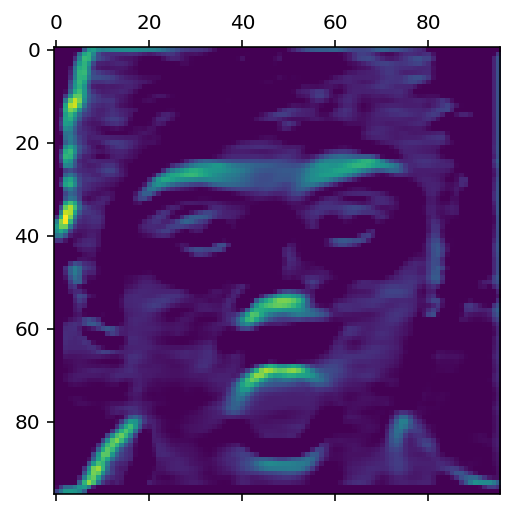

In [0]:
import matplotlib.pyplot as plt

plt.matshow(first_conv_layer_activation[0, :, :, 2], cmap='viridis')
plt.show()

This channel appears to encode a diagonal edge detector. Let's try the 30th channel -- but note that your own channels may vary, since the 
specific filters learned by convolution layers are not deterministic.

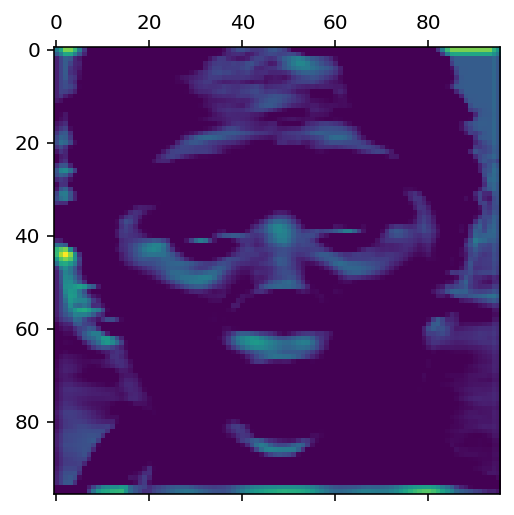

In [0]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

This one looks like a "bright green dot" detector, useful to encode cat eyes. At this point, let's go and plot a complete visualization of 
all the activations in the network. We'll extract and plot every channel in each of our 8 activation maps, and we will stack the results in 
one big image tensor, with channels stacked side by side.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.


RuntimeError: ignored

<Figure size 1152x0 with 1 Axes>

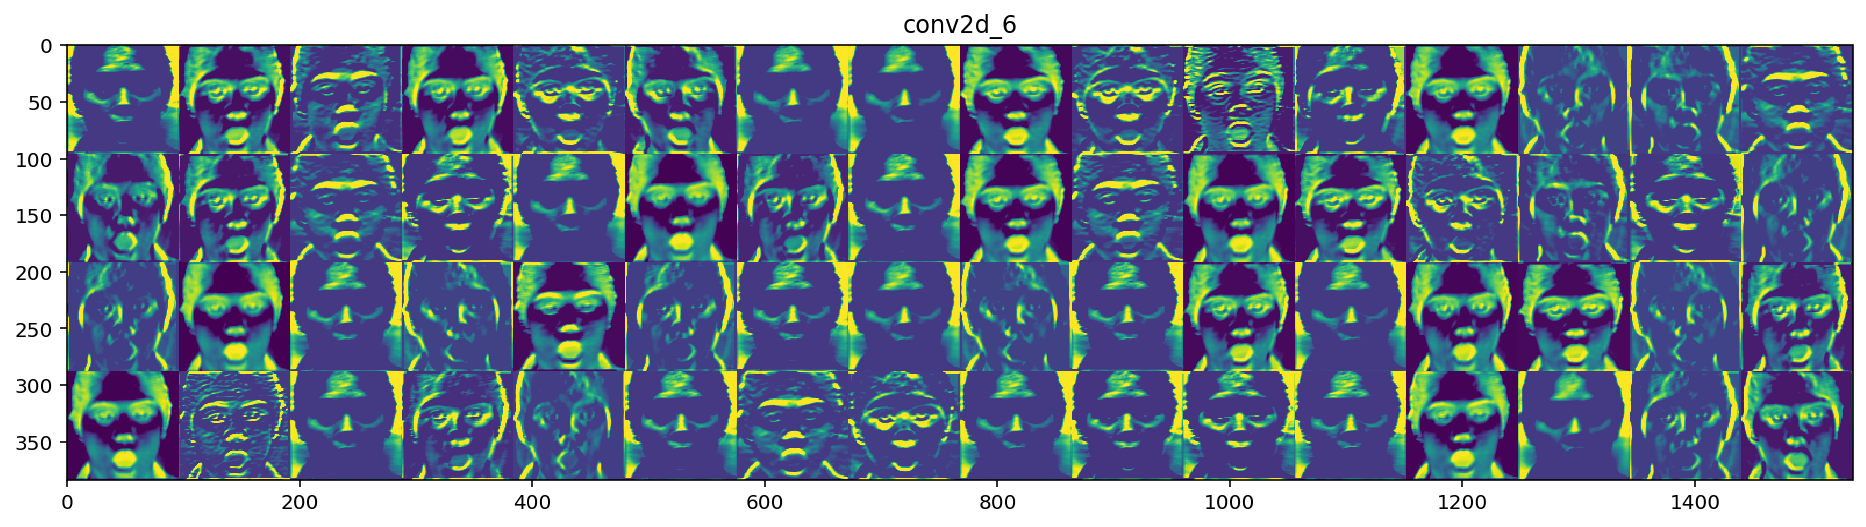

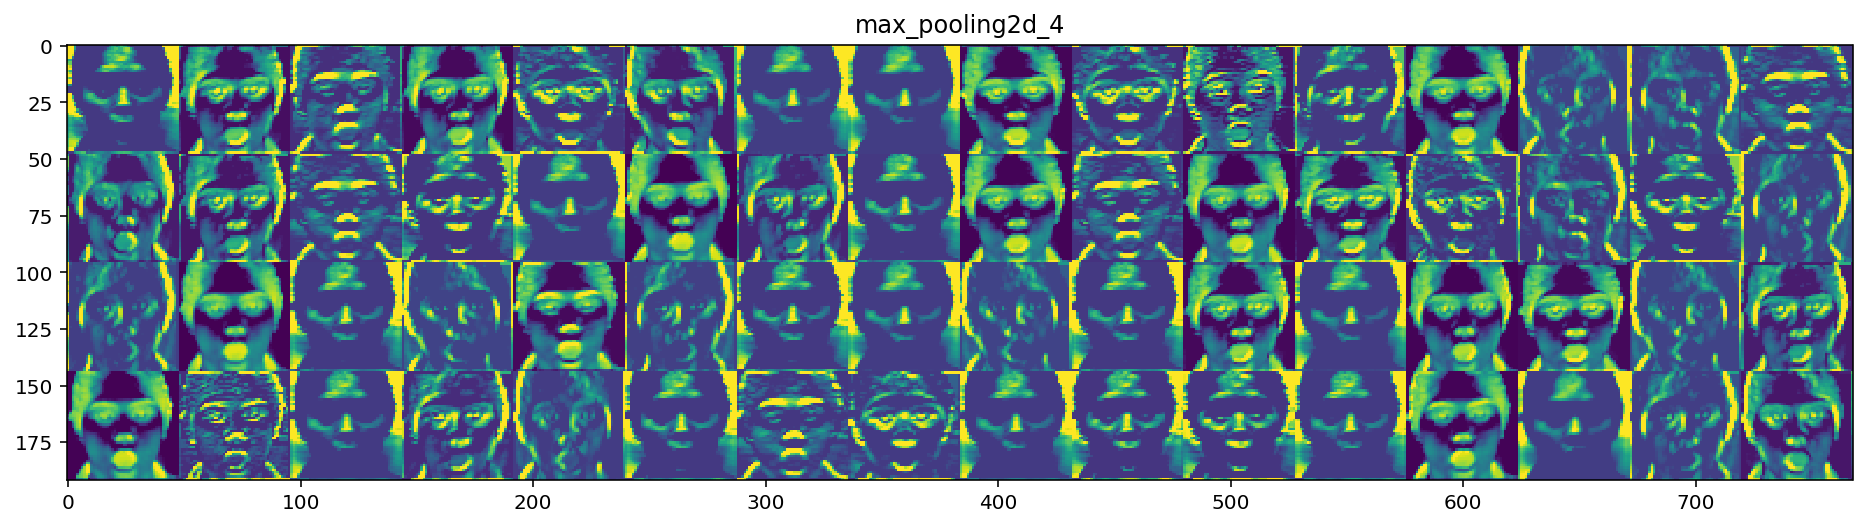

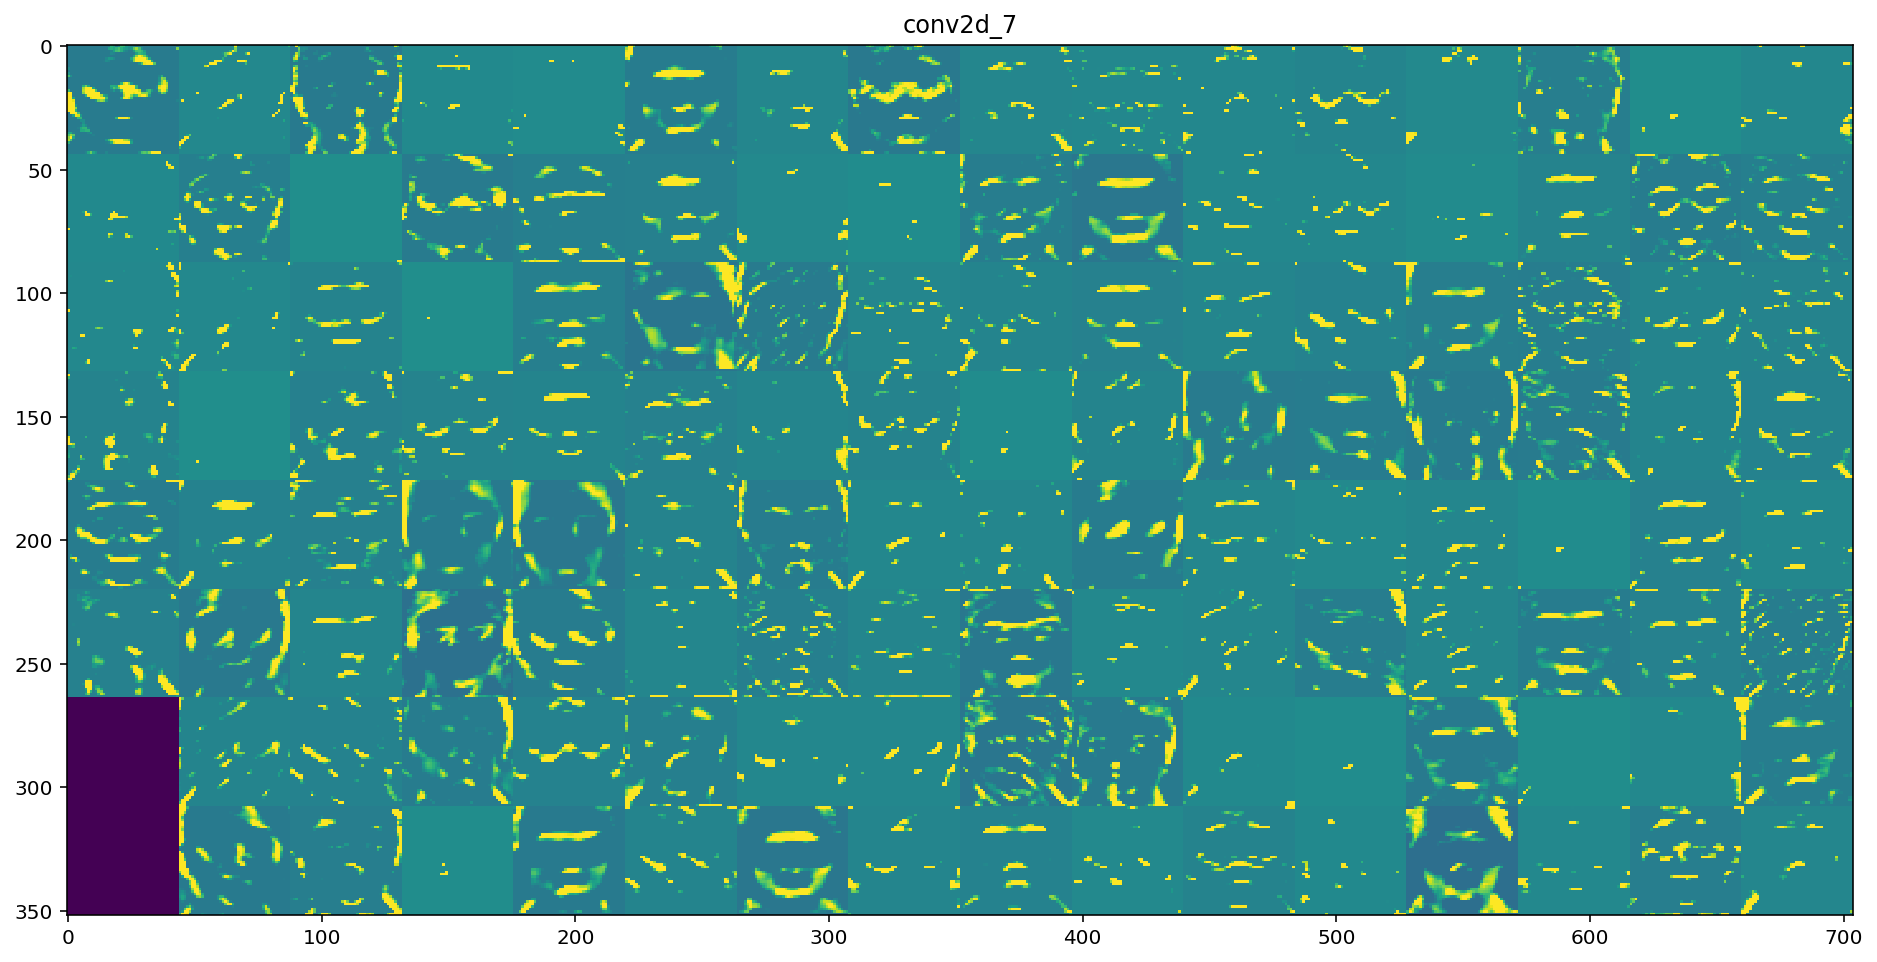

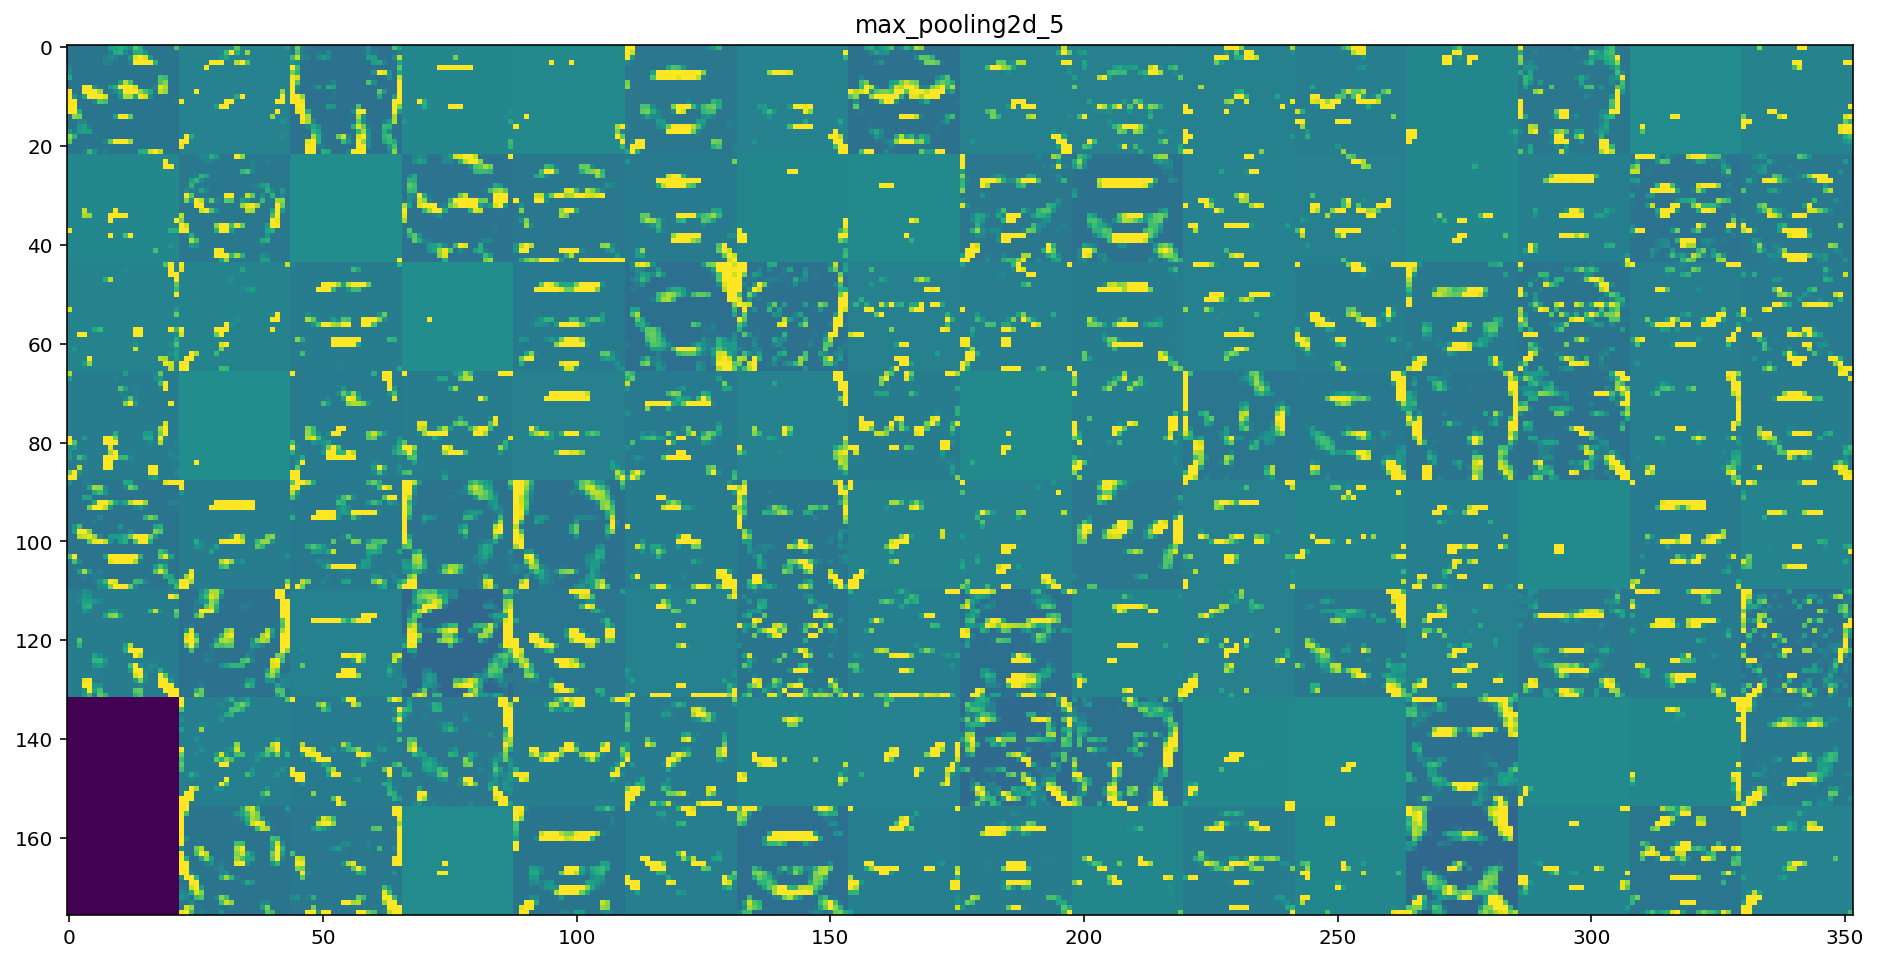

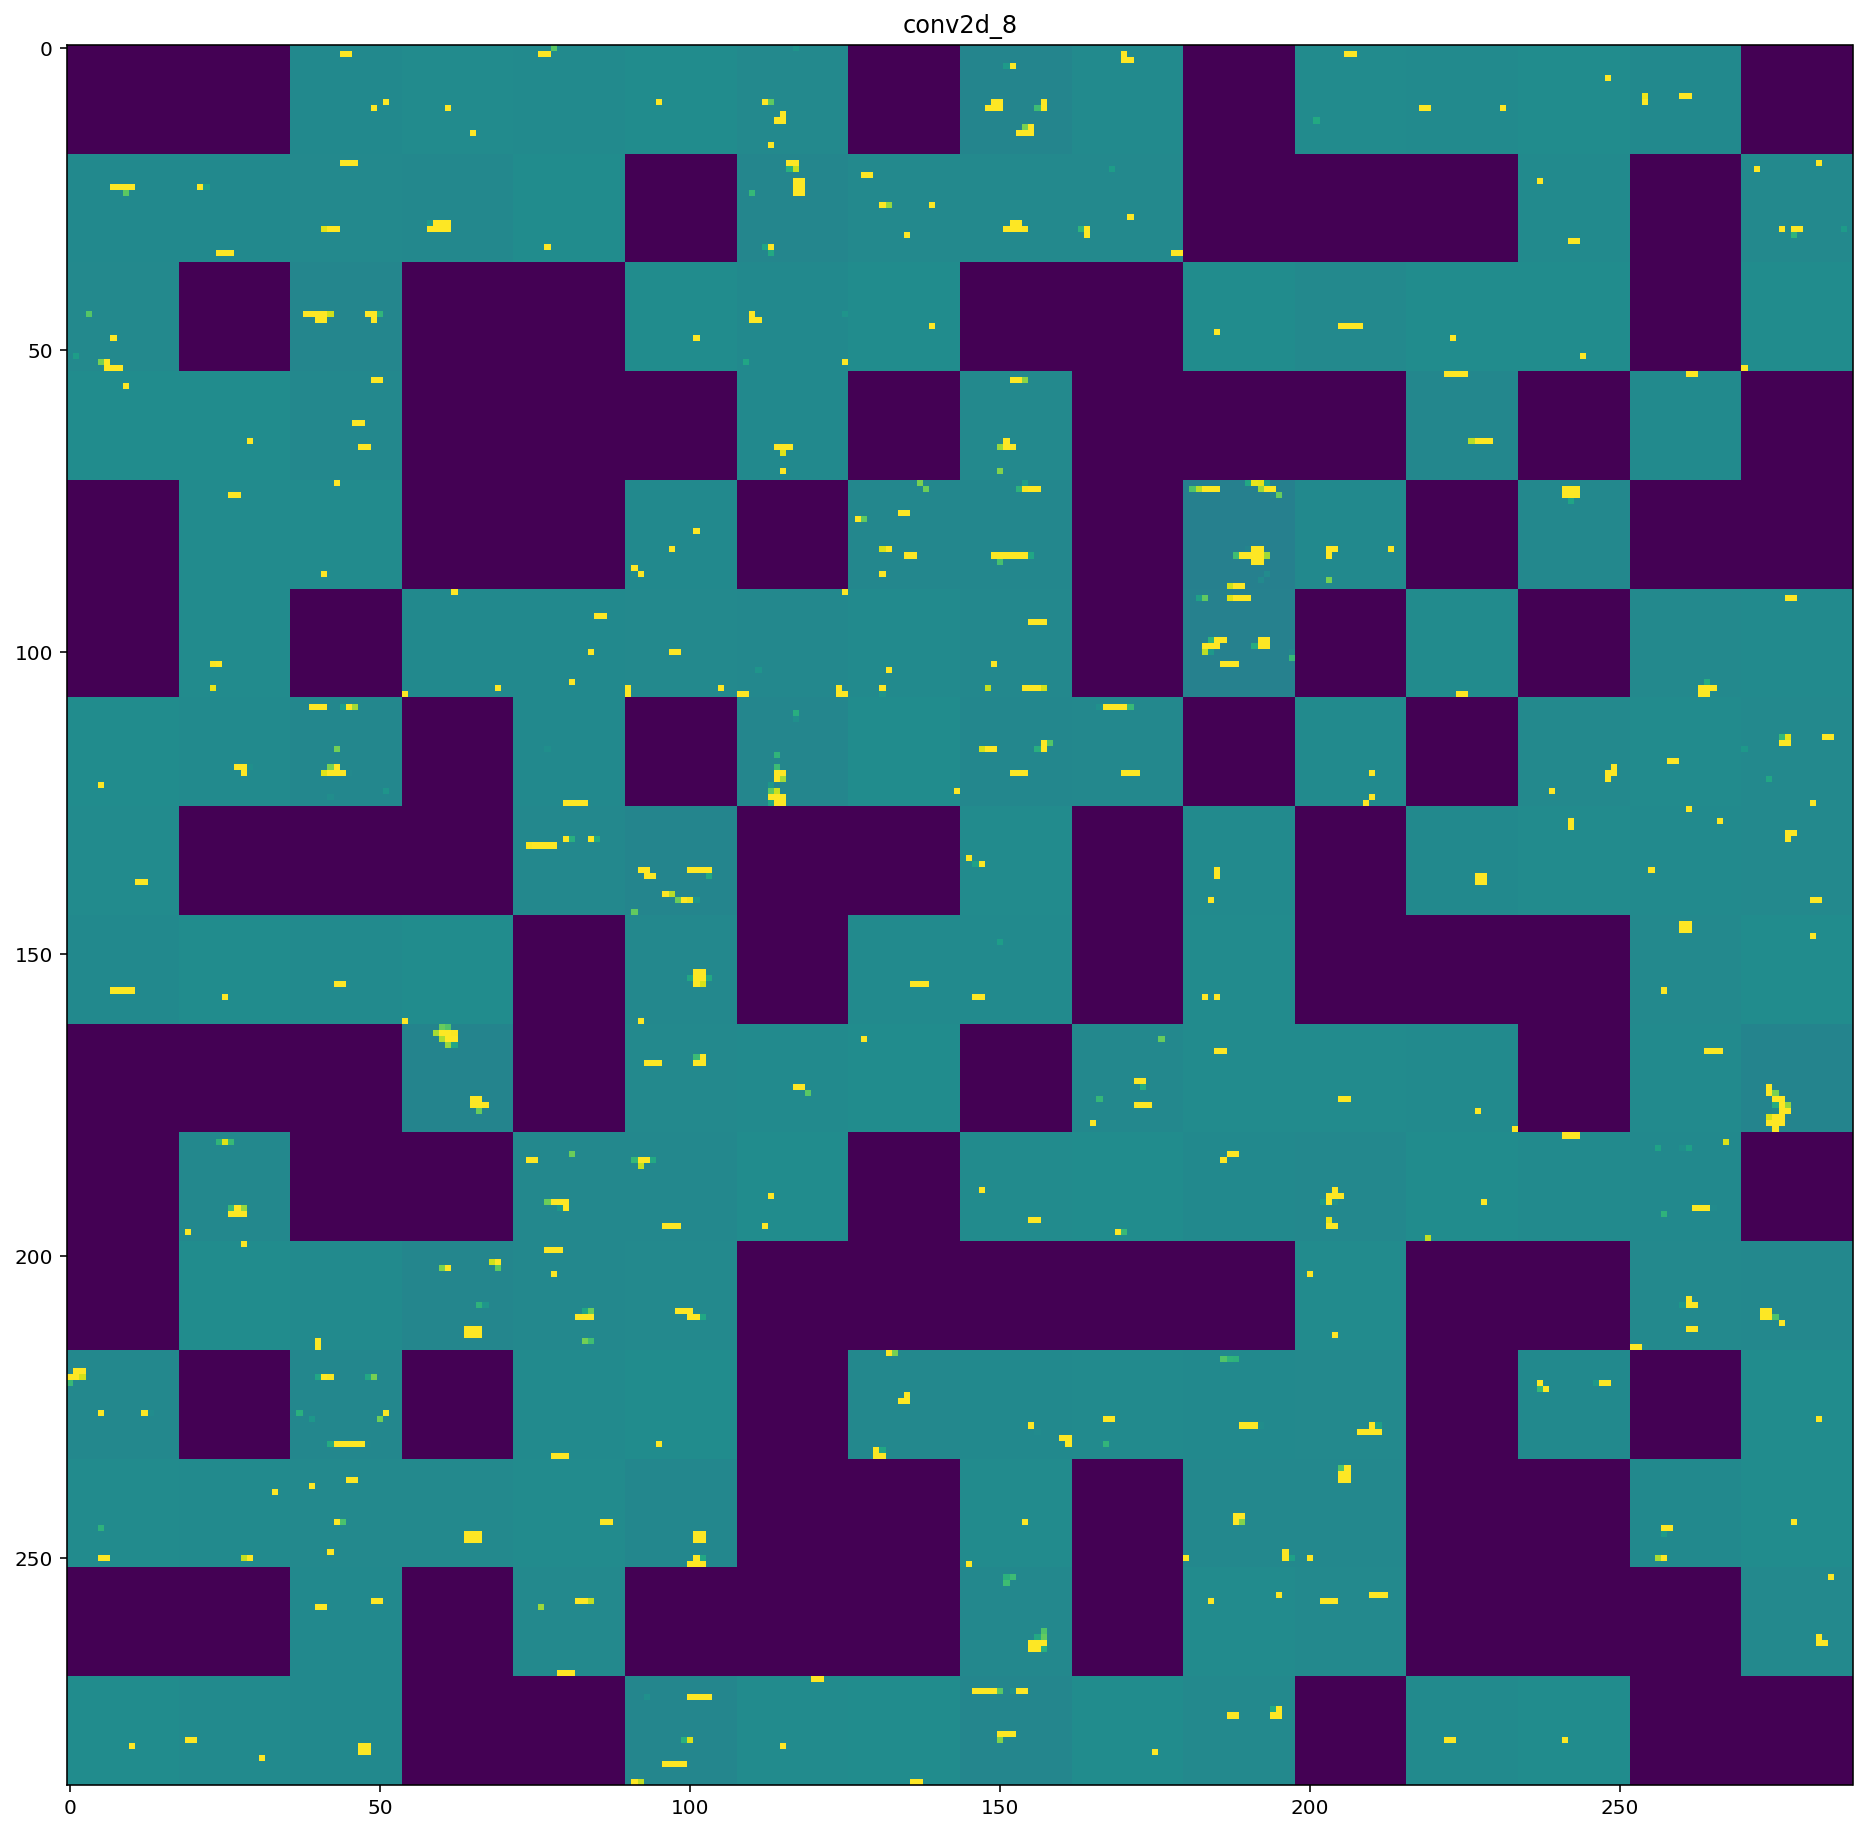

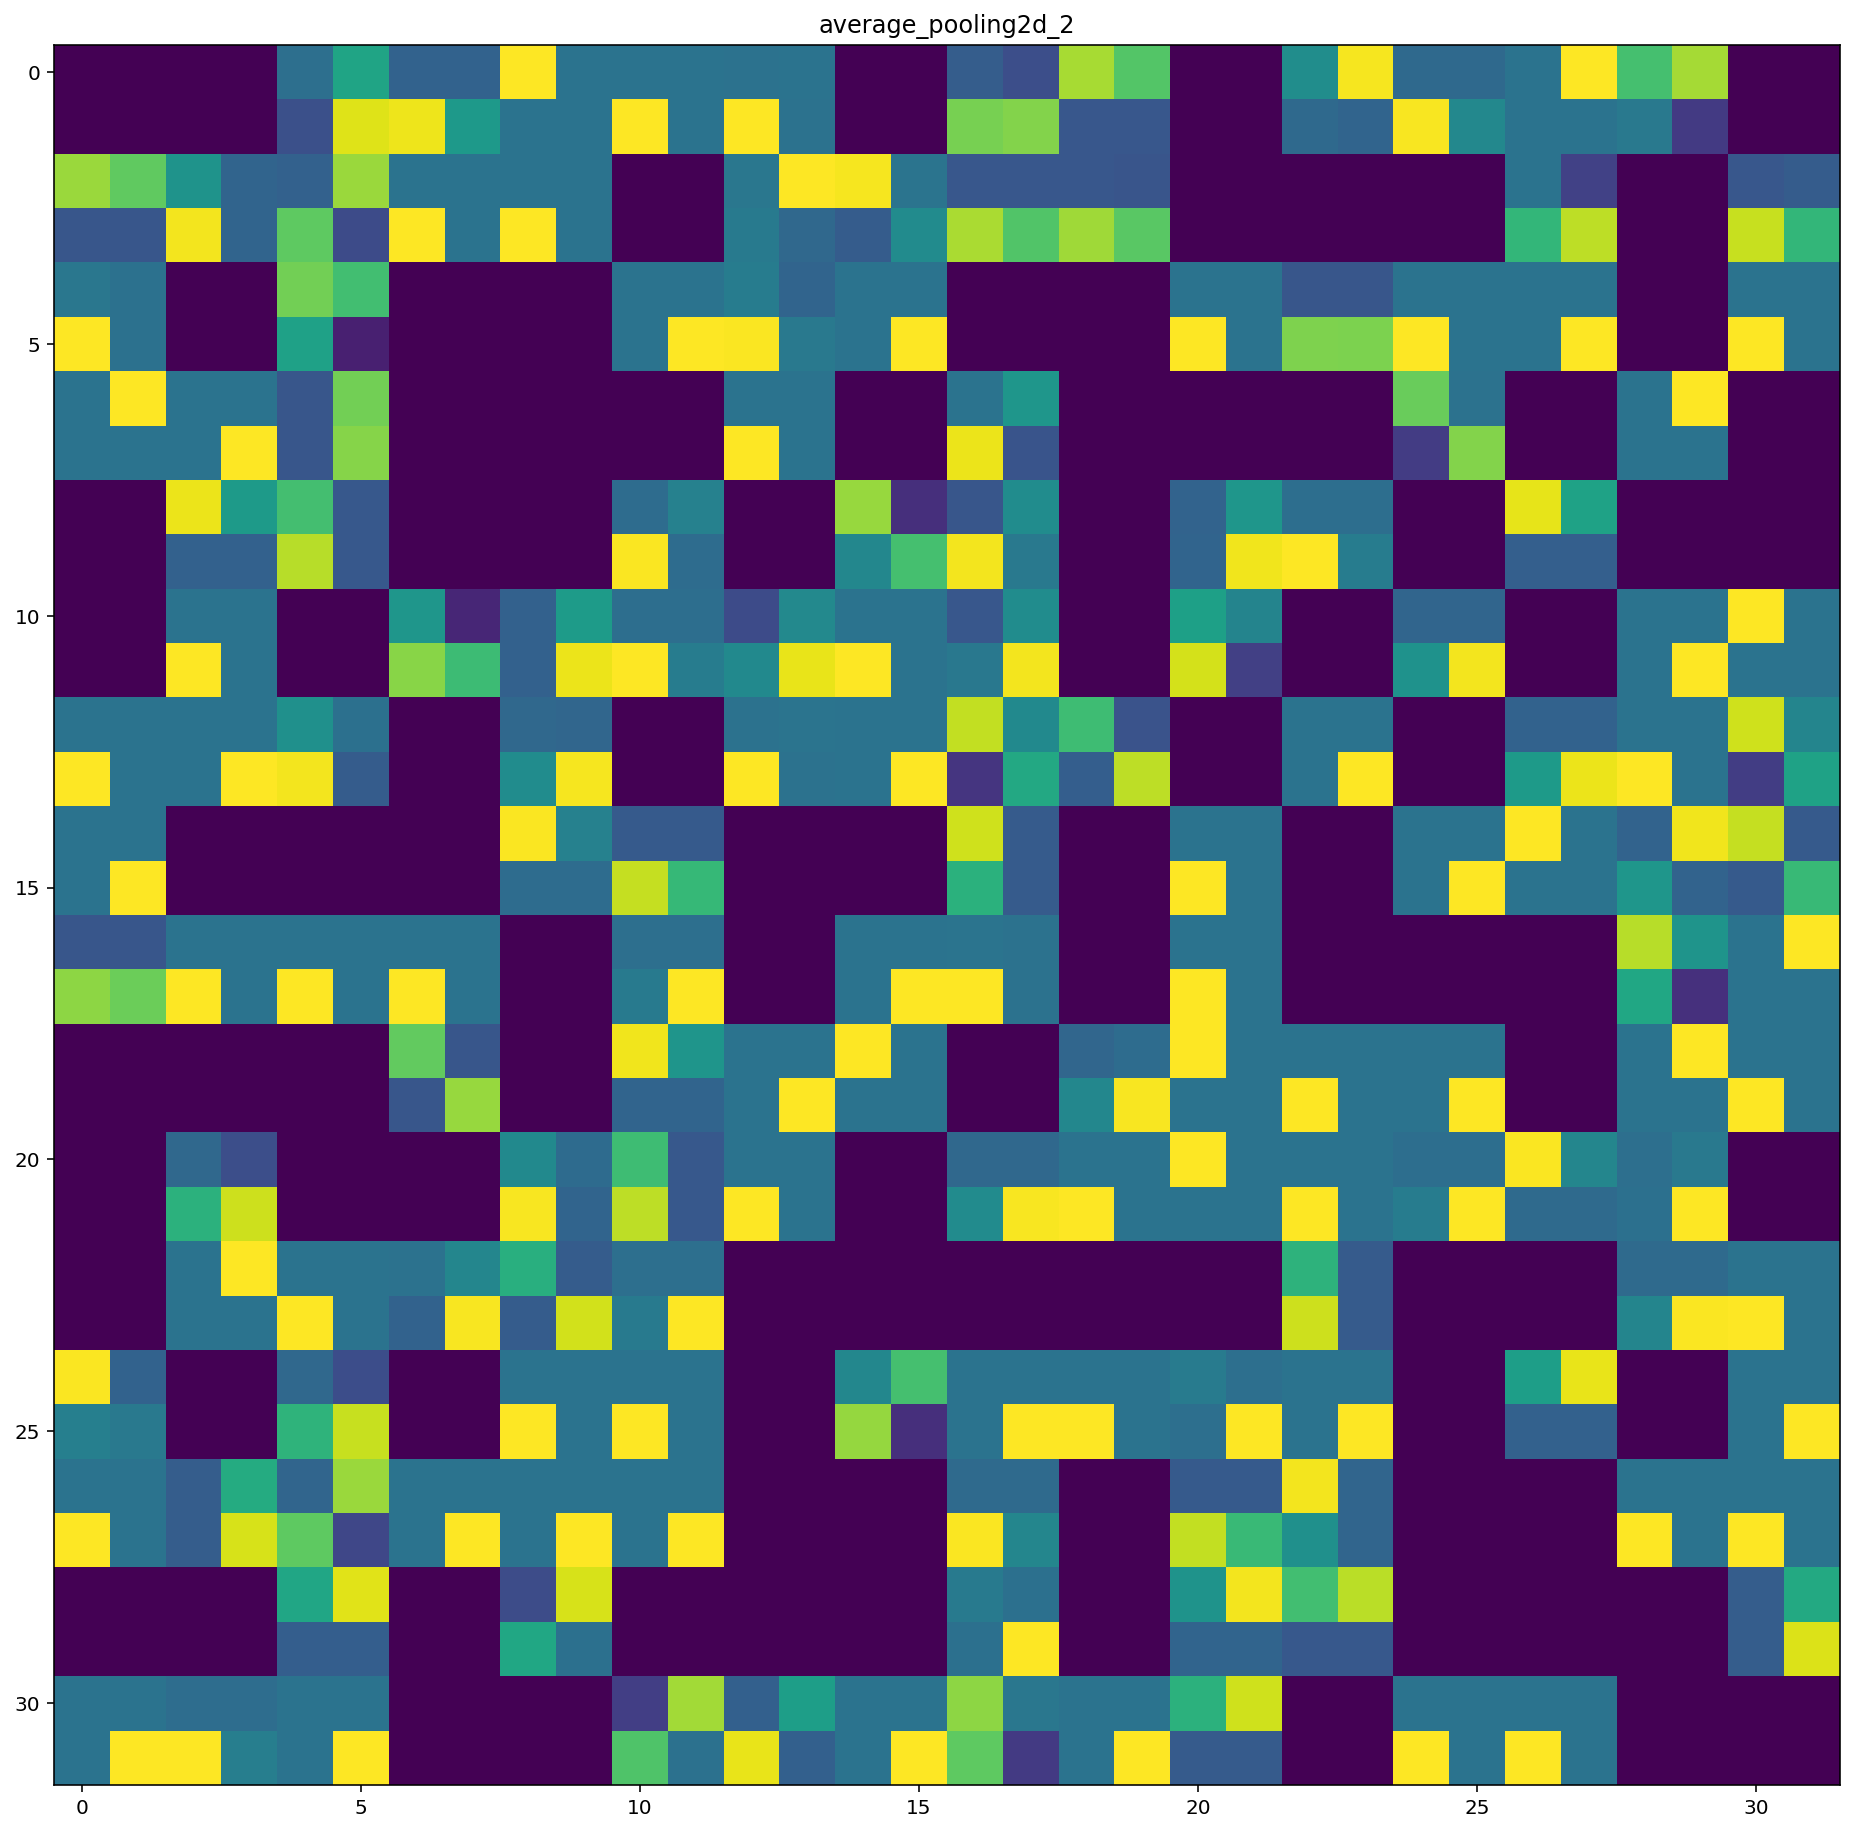

In [0]:
import tensorflow.keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:7]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

## Visualizing convnet filters


In [0]:
import tensorflow as tf
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# dimensions of the generated pictures for each filter.
img_width = IMAGE_SIZE[0]
img_height = IMAGE_SIZE[1]

base_model = load_model('/content/last_cnn_model.h5')
# this is the placeholder for the input images
input_img = base_model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in base_model.layers[1:]])

In [0]:
from tensorflow.keras import backend as K

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    # x -= x.mean()
    # x /= (x.std() + K.epsilon())
    # x *= 0.1

    # # clip to [0, 1]
    # x += 0.5
    # x = np.clip(x, 0, 1)

    # # convert to RGB array
    # x *= 255
    # x = np.clip(x, 0, 255).astype('uint8')
    return x

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    # return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())
    return x 
    
    
def gradient_ascent(iterate):
    # step size for gradient ascent
    step = 2.
    # step = 0.01

    # we start from a gray image with some random noise
    # input_img_data = np.random.random((1, img_width, img_height, 1))
    # input_img_data = (input_img_data - 0.5) * 20 + 128
    # input_img_data=np.full((1, img_width, img_height, 1),1,dtype='float32')
    x_own=[]
    for img_path in glob.glob('/content/data/*'):
      try:
        x_own.append(get_preprocessed_img(img_path))
      except Exception:
        print(str(Exception.with_traceback()))
    x_own = np.array(x_own) / 255.
    img_tensor =x_own
    input_img_data=img_tensor

    # we run gradient ascent for 20 steps
    for i in range(100):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        # print('------>Current loss value:', loss_value)
        # if loss_value <= 0.:
        #     print('------>Current invalid loss value:', loss_value)
        #     # some filters get stuck to 0, we can skip them
        #     break
        
    # decode the resulting input image
    print(f'Loss: {loss_value},  Grads: {np.mean(grads_value)}')
    if loss_value > 0:
      img = deprocess_image(input_img_data[0])
      kept_filters.append((img, loss_value))


def build_nth_filter_loss(filter_index, layer_name):
    """
    We build a loss function that maximizes the activation
    of the nth filter of the layer considered
    """
    
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    return iterate

 Iterating over some number of filters in a given layer_name

In [0]:
layers = [
          # 'conv2d_6',
          # 'conv2d_7',
          'conv2d_8']

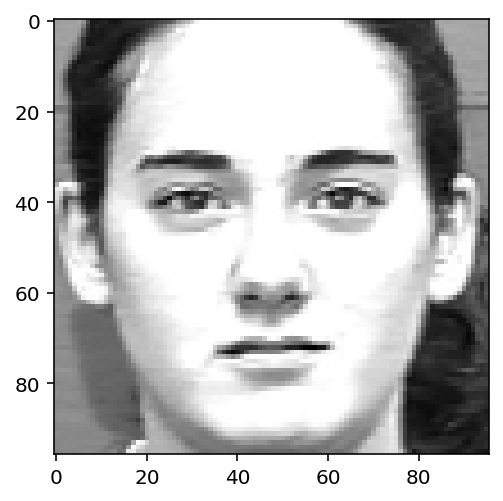

In [0]:
def get_emotion_label(seq_path):
    with open(seq_path, 'r') as file:
        label = int(float(file.read().strip()))
    return label


def extract_face(img_grey):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_grey, 1.1, 4)
    for (x, y, w, h) in faces:
        return img_grey[y:y + h, x:x + w]


def get_preprocessed_img(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_face = extract_face(img_gray)
    img_face = cv2.resize(img_face, IMAGE_SIZE)
    img_face = img_face.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
    return img_face

x_own=[]
for img_path in glob.glob('/content/data/*'):
  try:
    x_own.append(get_preprocessed_img(img_path))
  except Exception:
    print(str(Exception.with_traceback()))
x_own = np.array(x_own) / 255.
img_tensor =x_own

img = img_tensor[0].reshape(IMAGE_SIZE)
plt.imshow(img, cmap='gray')
plt.show()

In [0]:
import time

kept_filters = []
filters_dict = dict()
for layer_name in layers:
    layer = base_model.get_layer(layer_name)
    print('Processing filter for layer:', layer_name)
    for filter_index in range(min(layer.output.shape[-1], 10)):
        print('Processing filter %d' % filter_index)

        start_time = time.time()
        gradient_ascent(build_nth_filter_loss(filter_index, layer_name))
        end_time = time.time()

        print('--->Filter %d processed in %ds' % (filter_index, end_time - start_time))
    filters_dict[layer.name] = kept_filters
    kept_filters = []

Processing filter for layer: conv2d_8
Processing filter 0
Loss: 0.0,  Grads: 0.0
--->Filter 0 processed in 2s
Processing filter 1
Loss: 2130.75244140625,  Grads: 0.0002495381631888449
--->Filter 1 processed in 2s
Processing filter 2
Loss: 743.9212646484375,  Grads: -0.001429440570063889
--->Filter 2 processed in 2s
Processing filter 3
Loss: 2109.501953125,  Grads: 0.0028020052704960108
--->Filter 3 processed in 2s
Processing filter 4
Loss: 211.25723266601562,  Grads: 0.0004553793405648321
--->Filter 4 processed in 2s
Processing filter 5
Loss: 0.0,  Grads: 0.0
--->Filter 5 processed in 2s
Processing filter 6
Loss: 0.0,  Grads: 0.0
--->Filter 6 processed in 2s
Processing filter 7
Loss: 1.2630324363708496,  Grads: 5.769111885456368e-05
--->Filter 7 processed in 2s
Processing filter 8
Loss: 739.0263061523438,  Grads: -0.00218904297798872
--->Filter 8 processed in 2s
Processing filter 9
Loss: 0.0,  Grads: 0.0
--->Filter 9 processed in 2s


In [0]:
for layer_name, kept_filters in filters_dict.items():
    print(layer_name, len(kept_filters))

conv2d_8 154


Stiching best filters on a black picture

In [0]:
from keras.preprocessing.image import save_img

def stich_filters(kept_filters, layer_name):
    # By default, we will stich the best 64 (n*n) filters on a 8 x 8 grid.
    n = int(np.sqrt(len(kept_filters)))
    # the filters that have the highest loss are assumed to be better-looking.
    # we will only keep the top 64 filters.
    kept_filters.sort(key=lambda x: x[1], reverse=True)
    kept_filters = kept_filters[:n * n]

    # build a black picture with enough space for
    # our 8 x 8 filters of size 128 x 128, with a 5px margin in between
    margin = 5
    width = n * img_width + (n - 1) * margin
    height = n * img_height + (n - 1) * margin
    stitched_filters = np.zeros((width, height, 1))

    # fill the picture with our saved filters
    for i in range(n):
        for j in range(n):
            img, loss = kept_filters[i * n + j]
            width_margin = (img_width + margin) * i
            height_margin = (img_height + margin) * j
            stitched_filters[
                width_margin: width_margin + img_width,
                height_margin: height_margin + img_height] = img

    # save the result to disk
    save_img(FIGURES_DIR+'stitched_filters_100_iter_2_step{}.png'.format(layer_name), stitched_filters)
    

for layer_name, kept_filters in filters_dict.items():
    print('Stiching filters for {}'.format(layer_name))
    stich_filters(kept_filters, layer_name)
    print('Completed.')

Stiching filters for conv2d_8
Completed.


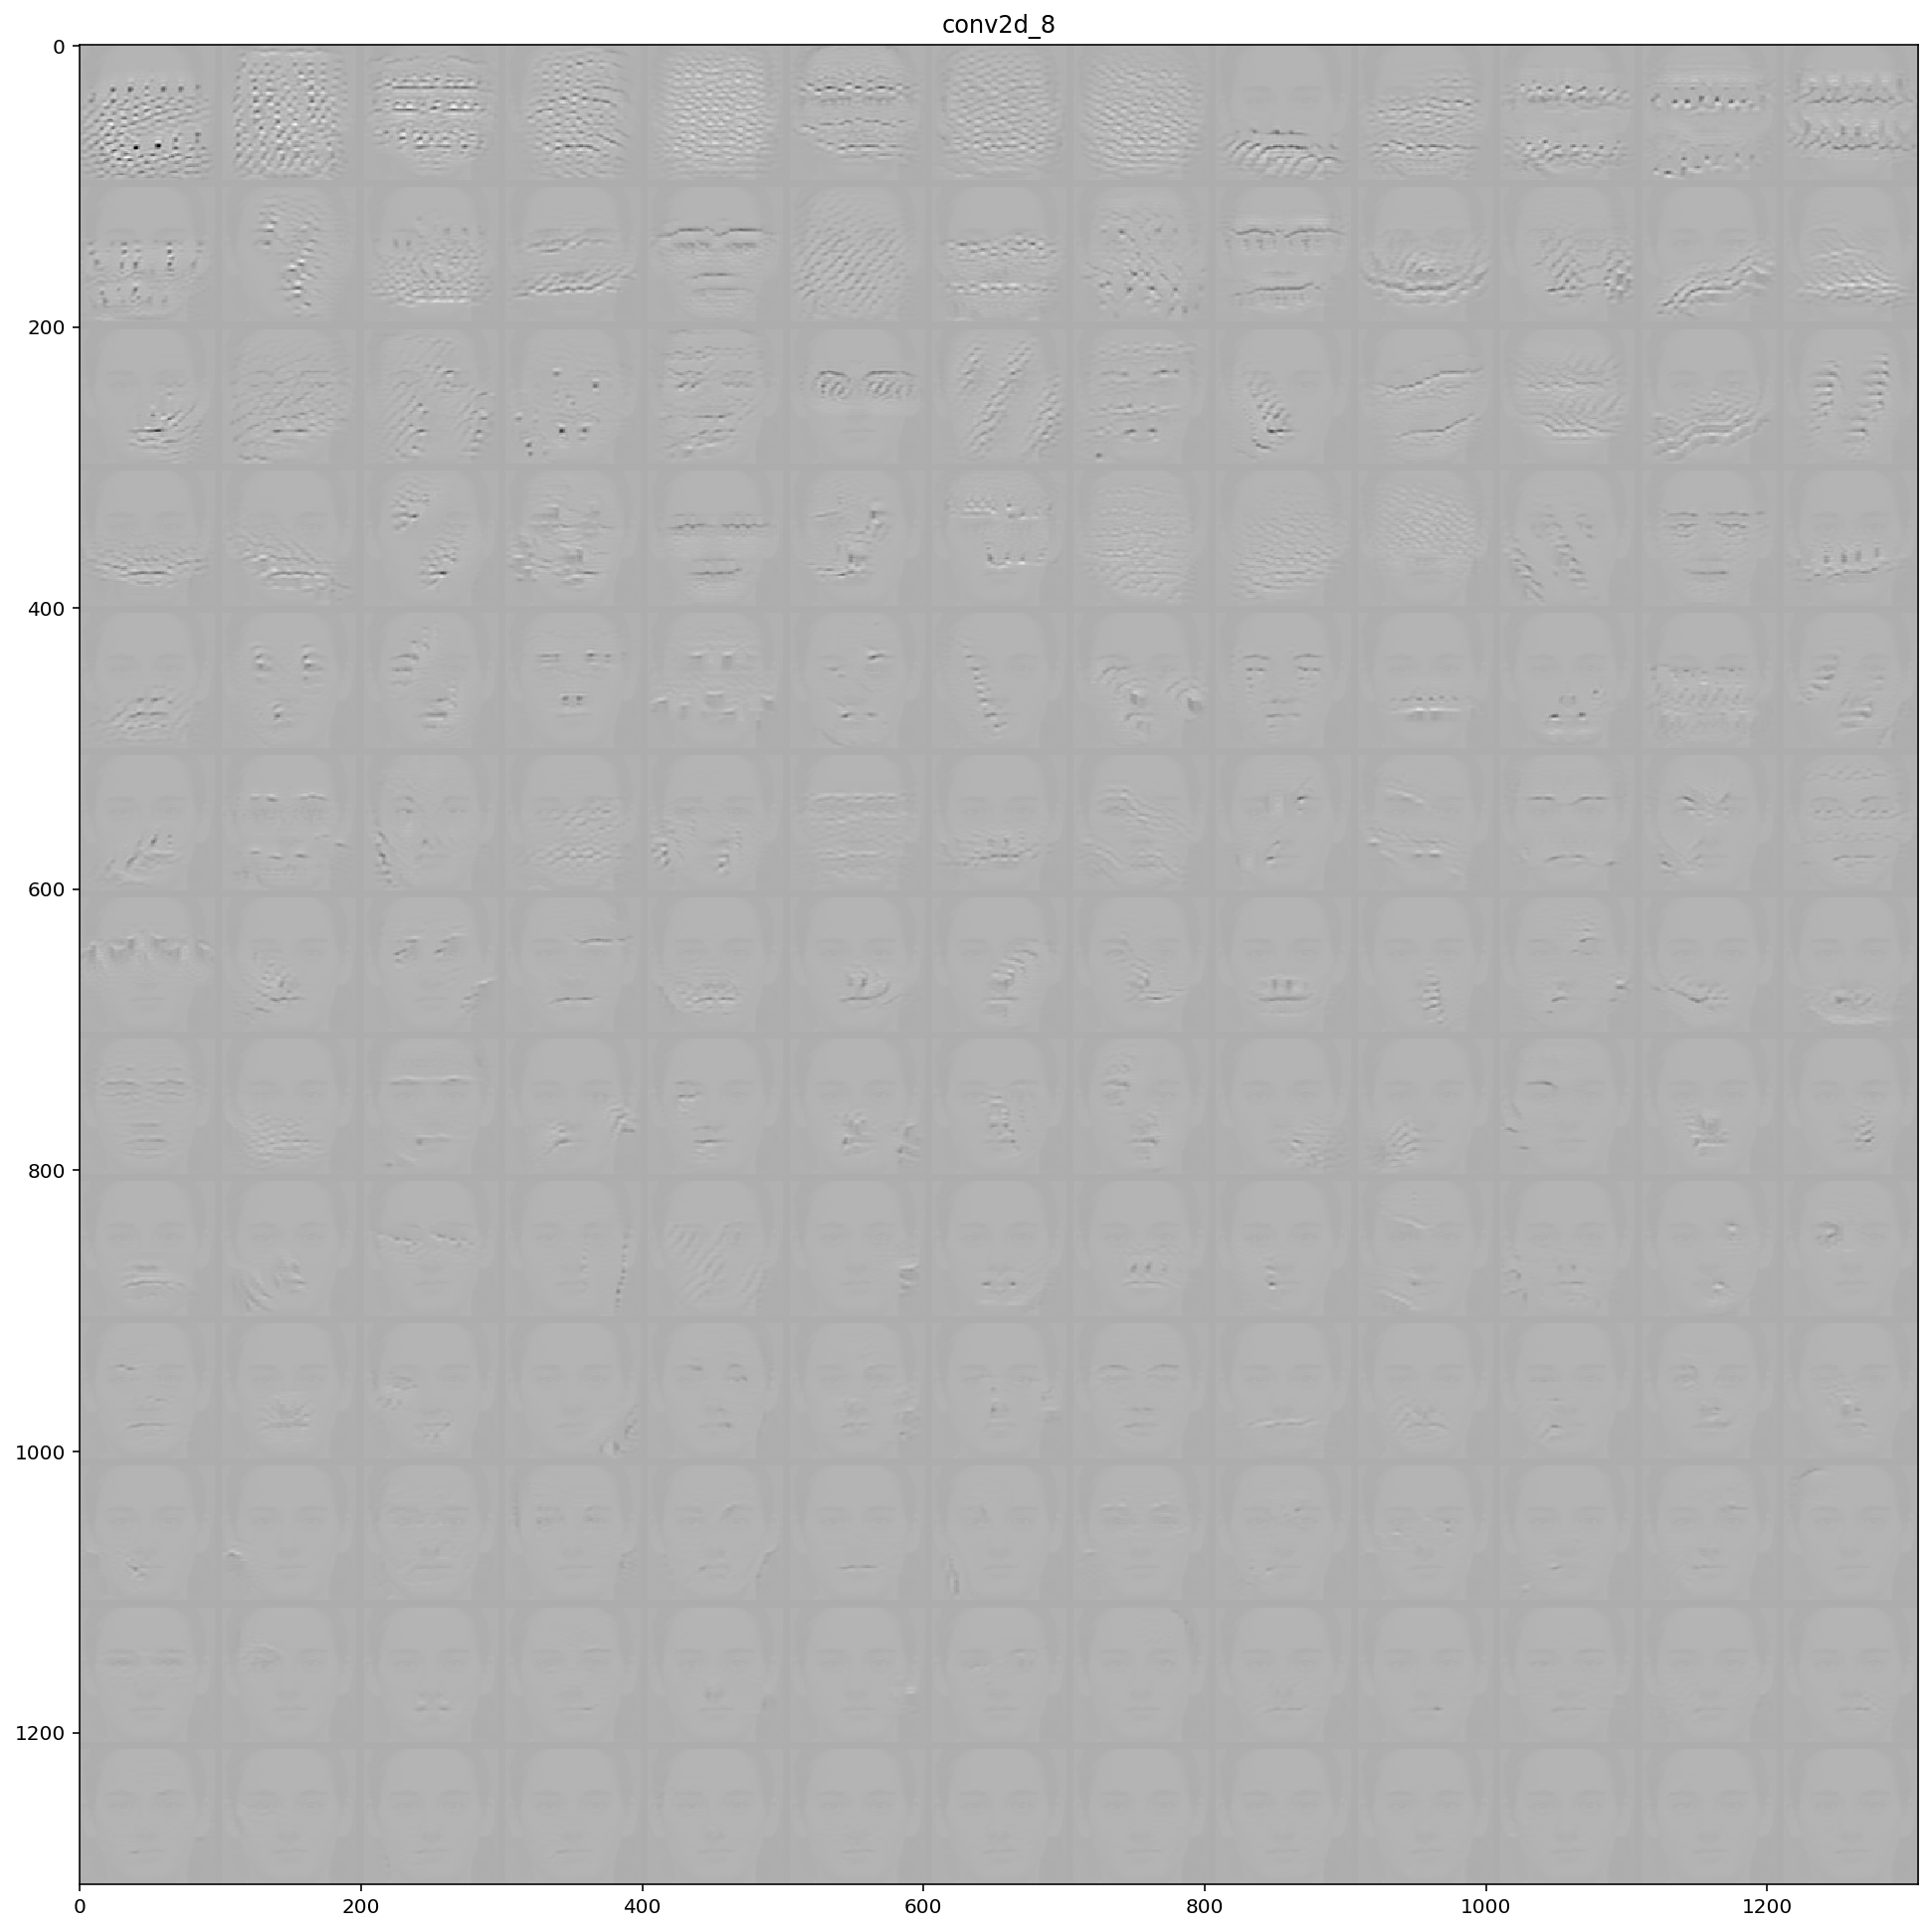

In [0]:
from keras.preprocessing import image

filter_name = 'conv2d_8'

img = image.img_to_array(image.load_img(FIGURES_DIR+'stitched_filters_{}.png'.format(filter_name))) /255.
plt.figure(figsize=(17,17))
plt.imshow(img)
plt.title(filter_name)
plt.grid(False)

### Generating from random noise



  0%|          | 0/64 [00:00<?, ?it/s]

  2%|▏         | 1/64 [00:02<02:43,  2.59s/it]

  3%|▎         | 2/64 [00:05<02:40,  2.59s/it]

  5%|▍         | 3/64 [00:07<02:37,  2.59s/it]

  6%|▋         | 4/64 [00:10<02:36,  2.61s/it]

  8%|▊         | 5/64 [00:13<02:34,  2.62s/it]

  9%|▉         | 6/64 [00:15<02:32,  2.63s/it]

 11%|█         | 7/64 [00:18<02:30,  2.64s/it]

 12%|█▎        | 8/64 [00:21<02:28,  2.65s/it]

 14%|█▍        | 9/64 [00:23<02:27,  2.69s/it]

 16%|█▌        | 10/64 [00:26<02:26,  2.71s/it]

 17%|█▋        | 11/64 [00:29<02:24,  2.72s/it]

 19%|█▉        | 12/64 [00:32<02:22,  2.75s/it]

 20%|██        | 13/64 [00:34<02:20,  2.76s/it]

 22%|██▏       | 14/64 [00:38<02:24,  2.90s/it]

 23%|██▎       | 15/64 [00:41<02:21,  2.88s/it]

 25%|██▌       | 16/64 [00:43<02:17,  2.87s/it]

 27%|██▋       | 17/64 [00:46<02:14,  2.87s/it]

 28%|██▊       | 18/64 [00:49<02:12,  2.89s/it]

 30%|██▉       | 19/64 [00:52<02:10,  2.89s/it]

 31%|███▏      | 20/64 [00:55<02:07,

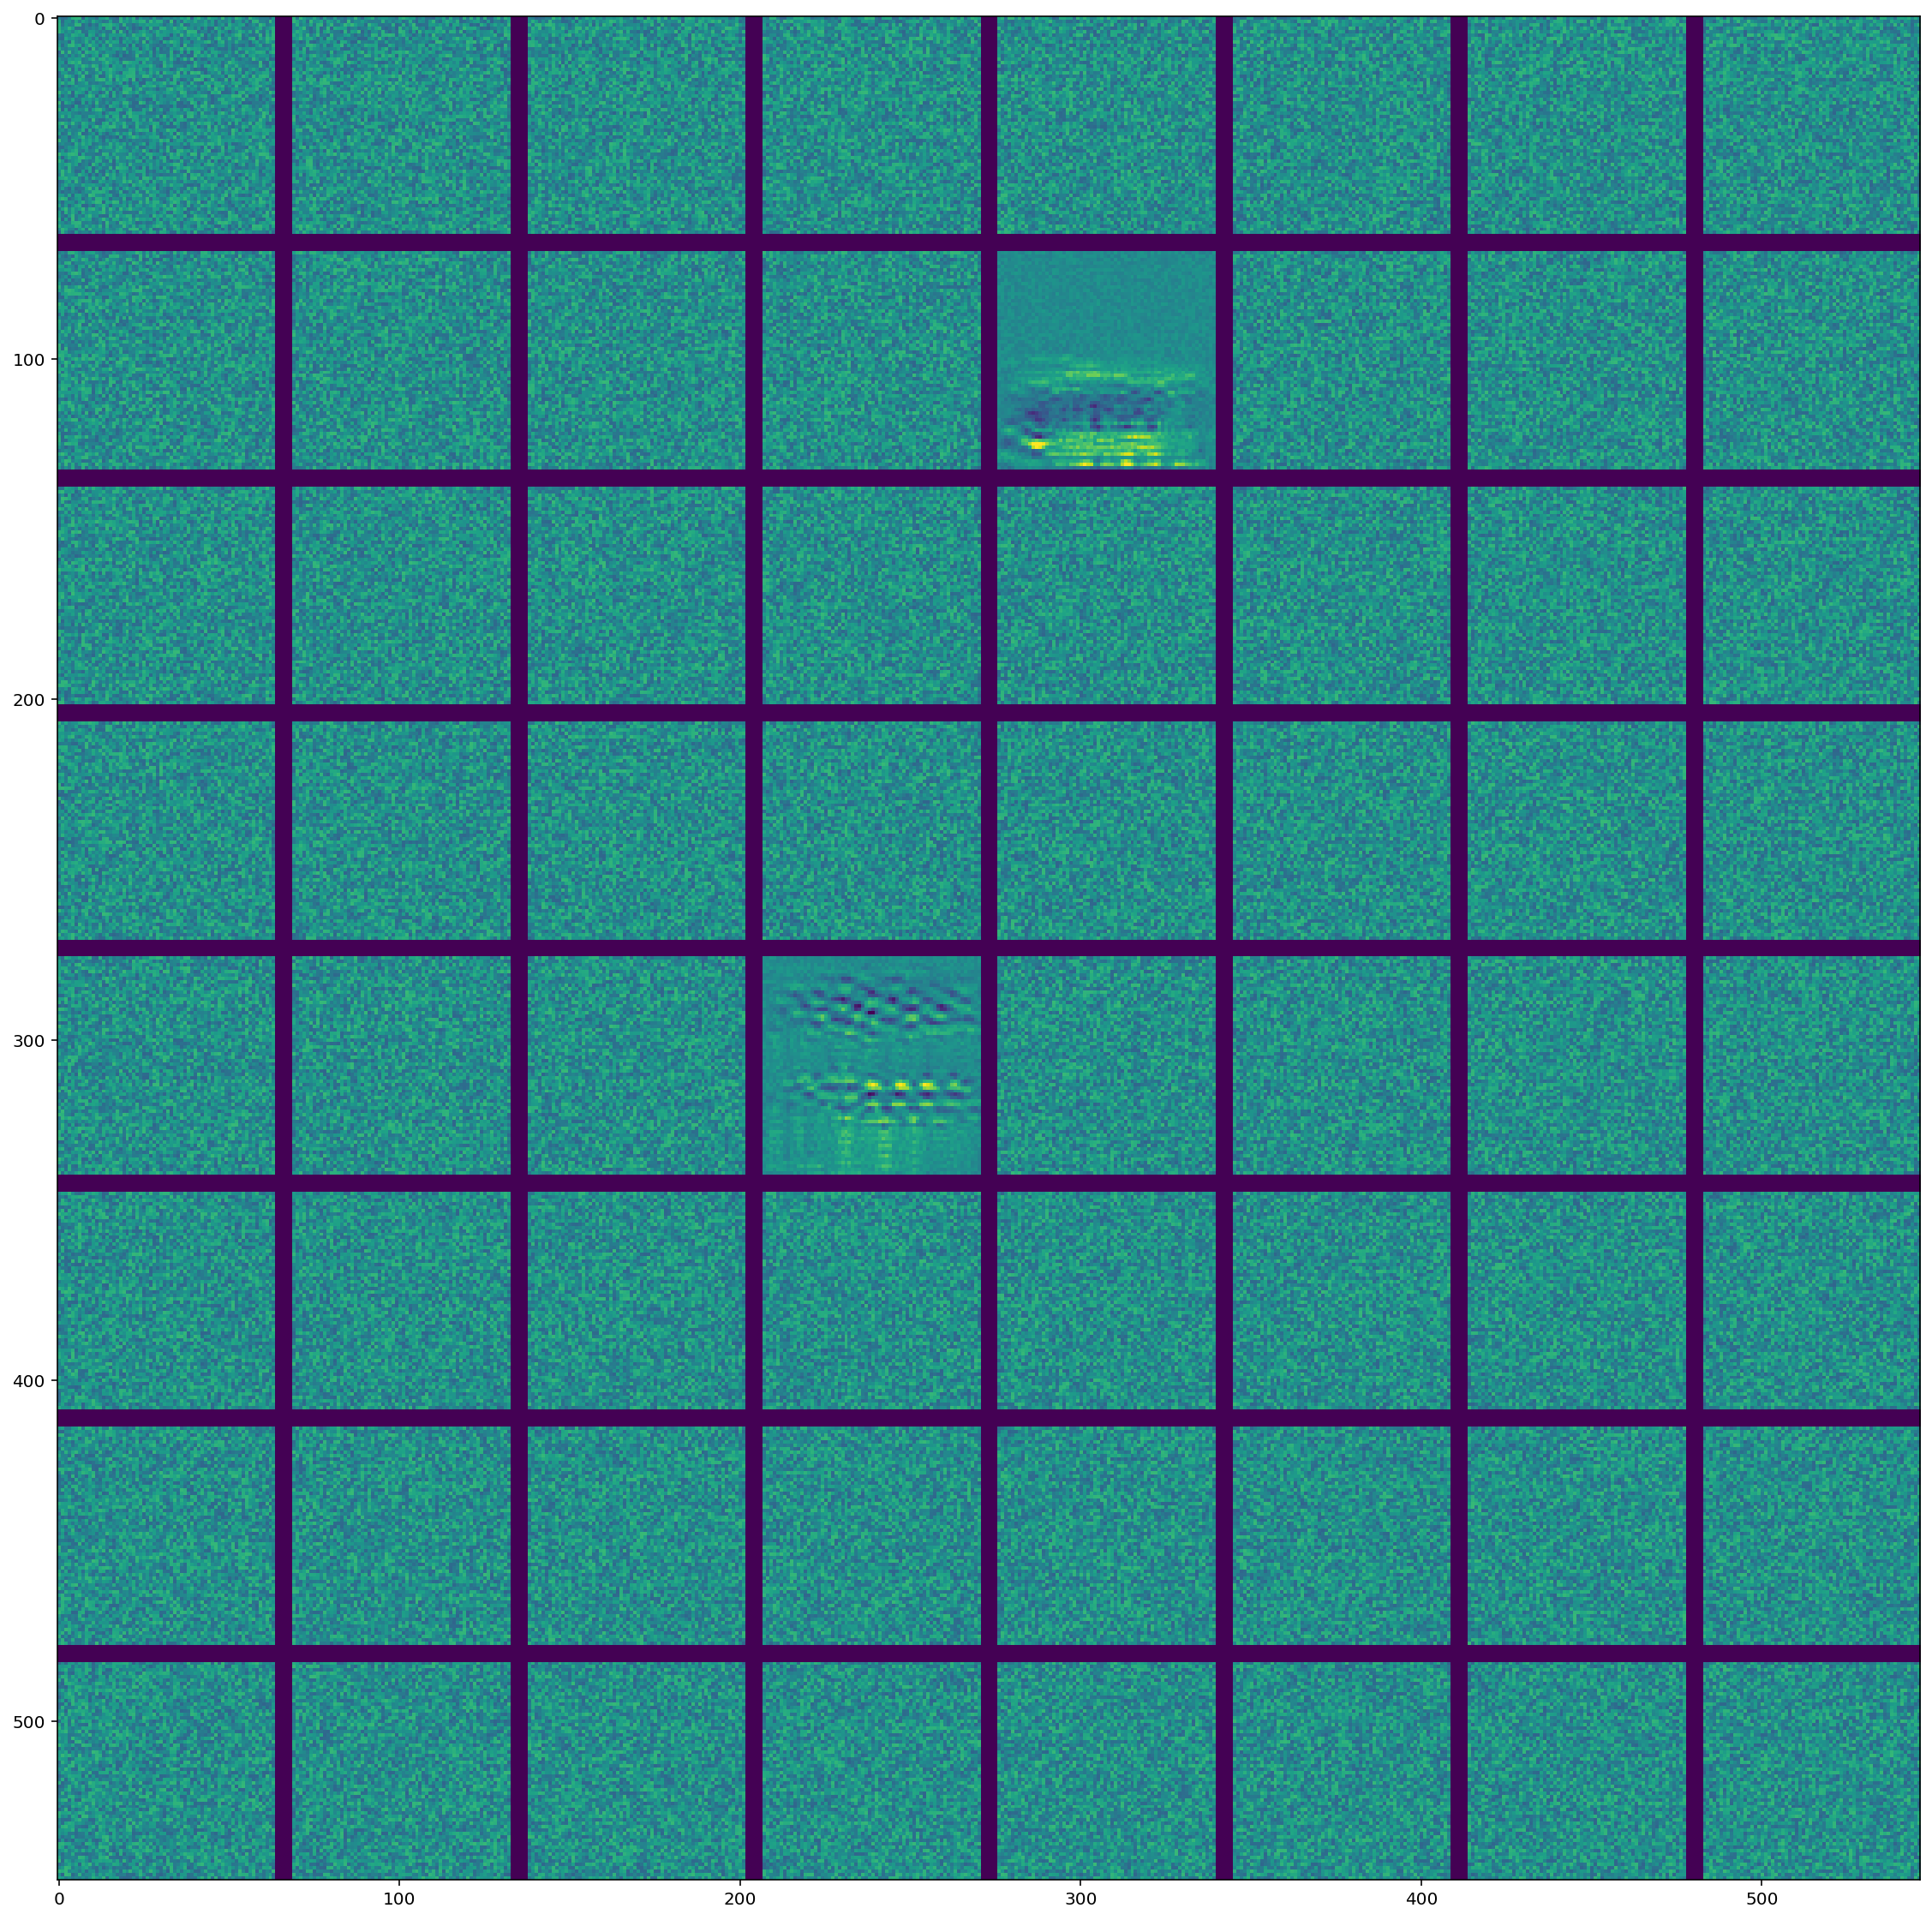

In [0]:

for layer_name in ['conv2d_8']:
    size = 64
    margin = 5

    # This a empty (black) image where we will store our results.
    results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 1))

    pbar = tqdm(total=64)
    for i in range(8):  # iterate over the rows of our results grid
        for j in range(8):  # iterate over the columns of our results grid
            # Generate the pattern for filter `i + (j * 8)` in `layer_name`
            filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
            pbar.update(1)

            # Put the result in the square `(i, j)` of the results grid
            horizontal_start = i * size + i * margin
            horizontal_end = horizontal_start + size
            vertical_start = j * size + j * margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img

    # Display the results grid
    plt.figure(figsize=(20, 20))
    plt.imshow(results.reshape((547,547)))
    plt.show()
pbar.close()

## Visualizing CNNs using deconvolutions 

In [0]:
class DInput(object):
    '''
    A class to define forward and backward operation on Input
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Input layer, whose configuration 
                   will be used to initiate DInput(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
    
    # input and output of Input layer are the same
    def up(self, data):
        '''
        function to operate input in forward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            data
        '''
        self.up_data = data
        return self.up_data
    
    def down(self, data):
        '''
        function to operate input in backward pass, the input and output
        are the same
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            data
        '''
        self.down_data = data
        return self.down_data

class DConvolution2D(object):
    '''
    A class to define forward and backward operation on Convolution2D
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Convolution2D layer, whose configuration 
                   will be used to initiate DConvolution2D(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer

        
        weights = layer.get_weights()
        W, b = weights
        config = layer.get_config()

        # Set up_func for DConvolution2D
        input = Input(shape = layer.input_shape[1:])
        output = Convolution2D.from_config(config)(input)
        up_func = Model(input, output)
        up_func.layers[1].set_weights(weights)
        self.up_func = up_func
        
        # Flip W horizontally and vertically, 
        # and set down_func for DConvolution2D
        W = np.transpose(W, (0, 1, 3, 2))
        W = W[::-1, ::-1, :, :]
        config['filters'] = W.shape[3]
        config['kernel_size'] = (W.shape[0], W.shape[1])
        b = np.zeros(config['filters'])
        input = Input(shape = layer.output_shape[1:])
        output = Convolution2D.from_config(config)(input)
        down_func = Model(input, output)
        down_func.layers[1].set_weights((W, b))
        self.down_func = down_func
        
    def up(self, data):
        '''
        function to compute Convolution output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Convolved result
        '''
        self.up_data = self.up_func.predict(data)
        return self.up_data

    def down(self, data):
        '''
        function to compute Deconvolution output in backward pass
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            Deconvolved result
        '''
        self.down_data= self.down_func.predict(data)
        return self.down_data

class DMaxPooling(object):
    '''
    A class to define forward and backward operation on Pooling
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Pooling layer, whose configuration 
                   will be used to initiate DPooling(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.poolsize = layer.pool_size
    
    def up(self, data):
        '''
        function to compute pooling output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Pooled result
        '''
        [self.up_data, self.switch] = \
                self.__max_pooling_with_switch(data, self.poolsize)
        return self.up_data

    def down(self, data):
        '''
        function to compute unpooling output in backward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Unpooled result
        '''
        self.down_data = self.__max_unpooling_with_switch(data, self.switch)
        return self.down_data
    
    def __max_pooling_with_switch(self, input, poolsize):
        '''
        Compute pooling output and switch in forward pass, switch stores 
        location of the maximum value in each poolsize * poolsize block
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
        # Returns
            Pooled result and Switch
        '''
        switch = np.zeros(input.shape)
        out_shape = list(input.shape)
        row_poolsize = int(poolsize[0])
        col_poolsize = int(poolsize[1])
        out_shape[1] = out_shape[1] // poolsize[0]
        out_shape[2] = out_shape[2] // poolsize[1]
        pooled = np.zeros(out_shape)
        
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                for row in range(out_shape[1]):
                    for col in range(out_shape[2]):
                        patch = input[sample, 
                                row * row_poolsize : (row + 1) * row_poolsize,
                                col * col_poolsize : (col + 1) * col_poolsize,
                                dim]
                        max_value = patch.max()
                        pooled[sample, row, col, dim] = max_value
                        max_col_index = patch.argmax(axis = -1)
                        max_cols = patch.max(axis = -1)
                        max_row = max_cols.argmax()
                        max_col = max_col_index[max_row]
                        switch[sample, 
                                row * row_poolsize + max_row, 
                                col * col_poolsize + max_col,
                              dim]  = 1
        return [pooled, switch]
    
    # Compute unpooled output using pooled data and switch
    def __max_unpooling_with_switch(self, input, switch):
        '''
        Compute unpooled output using pooled data and switch
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
            switch: switch storing location of each elements
        # Returns
            Unpooled result
        '''
        out_shape = switch.shape
        unpooled = np.zeros(out_shape)
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                tile = np.ones((switch.shape[1] // input.shape[1], 
                    switch.shape[2] // input.shape[2]))
                out = np.kron(input[sample, :, :, dim], tile)
                # print(input[sample, :, :, dim])
                # print(tile)
                # print(out.shape)
                # print(switch[sample, :, :, dim].shape)
                unpooled[sample, :, :, dim] = out * switch[sample, :, :, dim]
        return unpooled

class DAvgPooling(object):
    '''
    A class to define forward and backward operation on Pooling
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Pooling layer, whose configuration 
                   will be used to initiate DPooling(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.poolsize = layer.pool_size
    
    def up(self, data):
        '''
        function to compute pooling output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Pooled result
        '''
        [self.up_data, self.switch] = \
                self.__max_pooling_with_switch(data, self.poolsize)
        return self.up_data

    def down(self, data):
        '''
        function to compute unpooling output in backward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Unpooled result
        '''
        self.down_data = self.__max_unpooling_with_switch(data, self.switch)
        return self.down_data
    
    def __max_pooling_with_switch(self, input, poolsize):
        '''
        Compute pooling output and switch in forward pass, switch stores 
        location of the maximum value in each poolsize * poolsize block
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
        # Returns
            Pooled result and Switch
        '''
        switch = np.zeros(input.shape)
        out_shape = list(input.shape)
        row_poolsize = int(poolsize[0])
        col_poolsize = int(poolsize[1])
        out_shape[1] = out_shape[1] // poolsize[0]
        out_shape[2] = out_shape[2] // poolsize[1]
        pooled = np.zeros(out_shape)
        
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                for row in range(out_shape[1]):
                    for col in range(out_shape[2]):
                        patch = input[sample, 
                                row * row_poolsize : (row + 1) * row_poolsize,
                                col * col_poolsize : (col + 1) * col_poolsize,
                                dim]
                        max_value = patch.mean()
                        pooled[sample, row, col, dim] = max_value
                        max_col_index = patch.argmax(axis = -1)
                        max_cols = patch.mean(axis = -1)
                        max_row = max_cols.argmax()
                        max_col = max_col_index[max_row]
                        switch[sample, 
                                row * row_poolsize + max_row, 
                                col * col_poolsize + max_col,
                              dim]  = 1
        return [pooled, switch]
    
    # Compute unpooled output using pooled data and switch
    def __max_unpooling_with_switch(self, input, switch):
        '''
        Compute unpooled output using pooled data and switch
        # Arguments
            input: data to be pooled
            poolsize: size of pooling operation
            switch: switch storing location of each elements
        # Returns
            Unpooled result
        '''
        out_shape = switch.shape
        unpooled = np.zeros(out_shape)
        for sample in range(input.shape[0]):
            for dim in range(input.shape[3]):
                tile = np.ones((switch.shape[1] // input.shape[1], 
                    switch.shape[2] // input.shape[2]))
                out = np.kron(input[sample, :, :, dim], tile)
                unpooled[sample, :, :, dim] = out * switch[sample, :, :, dim]
        return unpooled


class DActivation(object):
    '''
    A class to define forward and backward operation on Activation
    '''
    def __init__(self, layer, linear = False):
        '''
        # Arguments
            layer: an instance of Activation layer, whose configuration 
                   will be used to initiate DActivation(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.linear = linear
        self.activation = layer.activation
        input = K.placeholder(shape = layer.output_shape)

        output = self.activation(input)
        # According to the original paper, 
        # In forward pass and backward pass, do the same activation(relu)
        self.up_func = K.function(
                [input, K.learning_phase()], [output])
        self.down_func = K.function(
                [input, K.learning_phase()], [output])

    # Compute activation in forward pass
    def up(self, data, learning_phase = 0):
        '''
        function to compute activation in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.up_data = self.up_func([data, learning_phase])[0]
        return self.up_data

    # Compute activation in backward pass
    def down(self, data, learning_phase = 0):
        '''
        function to compute activation in backward pass
        # Arguments
            data: Data to be operated in backward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Activation
        '''
        self.down_data = self.down_func([data, learning_phase])[0]
        return self.down_data
    
class DDense(object):
    '''
    A class to define forward and backward operation on Dense
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Dense layer, whose configuration 
                   will be used to initiate DDense(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        weights = layer.get_weights()
        W, b = weights
        config = layer.get_config()
        
        #Set up_func for DDense
        input = Input(shape = layer.input_shape[1:])
        output = Dense.from_config(config)(input)
        up_func = Model(input, output)
        up_func.set_weights(weights)
        self.up_func = up_func
        
        #Transpose W and set down_func for DDense
        W = W.transpose()
        self.input_shape = layer.input_shape
        self.output_shape = layer.output_shape
        b = np.zeros(self.input_shape[1])
        flipped_weights = [W, b]
        input = Input(shape = self.output_shape[1:])
        output = Dense(units = self.input_shape[1])(input)
        down_func = Model(input, output)
        down_func.set_weights(flipped_weights)
        self.down_func = down_func
    

    def up(self, data):
        '''
        function to compute dense output in forward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Result of dense layer
        '''
        self.up_data = self.up_func.predict(data)
        return self.up_data
        
    def down(self, data):
        '''
        function to compute dense output in backward pass
        # Arguments
            data: Data to be operated in forward pass
        # Returns
            Result of reverse dense layer
        '''
        # data = data - self.bias
        self.down_data = self.down_func.predict(data)
        return self.down_data
    
class DFlatten(object):
    '''
    A class to define forward and backward operation on Flatten
    '''
    def __init__(self, layer):
        '''
        # Arguments
            layer: an instance of Flatten layer, whose configuration 
                   will be used to initiate DFlatten(input_shape, 
                   output_shape, weights)
        '''
        self.layer = layer
        self.shape = layer.input_shape[1:]
        self.up_func = K.function(
                [layer.input, K.learning_phase()], [layer.output])

    # Flatten 2D input into 1D output
    def up(self, data, learning_phase = 0):
        '''
        function to flatten input in forward pass
        # Arguments
            data: Data to be operated in forward pass
            learning_phase: learning_phase of Keras, 1 or 0
        # Returns
            Flattened data
        '''
        self.up_data = self.up_func([data, learning_phase])[0]
        return self.up_data

    # Reshape 1D input into 2D output
    def down(self, data):
        '''
        function to unflatten input in backward pass
        # Arguments
            data: Data to be operated in backward pass
        # Returns
            Recovered data
        '''
        new_shape = [data.shape[0]] + list(self.shape)
        assert np.prod(self.shape) == np.prod(data.shape[1:])
        self.down_data = np.reshape(data, new_shape)
        return self.down_data


In [0]:
def find_top_filters(output, top=10):
    filter_sum = []
    for filter_index in range(output.shape[-1]):
        if output.ndim == 2:
            sum_value = np.sum(output[:, filter_index])
        else:
            sum_value = np.sum(output[:, :, :, filter_index])
        if sum_value > 0:
            filter_sum.append((filter_index, sum_value))
    filter_sum.sort(key=lambda x: x[1], reverse=True)
    return filter_sum[:top]

def visualize_all_layers(model, data, layer_name='predictions', visualize_mode='all'):
    '''
    function to visualize feature
    # Arguments
        model: Pre-trained model used to visualize data
        data: image to visualize
        layer_name: Name of layer to visualize
        feature_to_visualize: Features to visualize
        visualize_mode: Visualize mode, 'all' or 'max', 'max' will only pick 
                        the greates activation in a feature map and set others
                        to 0s, this will indicate which part fire the neuron 
                        most; 'all' will use all values in a feature map,
                        which will show what image the filter sees. For 
                        convolutional layers, There is difference between 
                        'all' and 'max', for Dense layer, they are the same
    # Returns
        The image reflecting feature
    '''
    deconv_layers = []
    # Stack layers
    for layer in model.layers:
        if isinstance(layer, Convolution2D):
            deconv_layers.append((layer.name, DConvolution2D(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, MaxPooling2D):
            deconv_layers.append((layer.name, DMaxPooling(layer)))
        elif isinstance(layer, AvgPool2D):
            deconv_layers.append((layer.name, DAvgPooling(layer)))
        elif isinstance(layer, Dense):
            deconv_layers.append((layer.name, DDense(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, Activation):
            deconv_layers.append((layer.name, DActivation(layer)))
        elif isinstance(layer, Flatten):
            deconv_layers.append((layer.name, DFlatten(layer)))
        elif isinstance(layer, InputLayer):
            deconv_layers.append((layer.name, DInput(layer)))
        else:
            print('Cannot handle this type of layer')
            print(layer.get_config())
            sys.exit()
        if layer_name == layer.name:
            break

    print(np.asarray(deconv_layers).shape)
    print(deconv_layers)
    # Forward pass
    deconv_layers[0][1].up(data)
    for i in range(1, len(deconv_layers)):
        print(deconv_layers[i][1])
        deconv_layers[i][1].up(deconv_layers[i - 1][1].up_data)
        
    # Selecting layers to visualize
    layers_to_visualize = []
    model_layers = set([layer.name for layer in model.layers])
    layers_to_visualize = [x for x, y in enumerate(deconv_layers) 
                           if y[0] in model_layers]
    layers_to_visualize.reverse()
    # Removing the input layer
    layers_to_visualize.pop()
    print('layers_to_visualize:', layers_to_visualize)
    
    deconv_dict = dict()
    for i in layers_to_visualize:
        deconv_list = []
        output = deconv_layers[i][1].up_data
        top_filters = find_top_filters(output)
        print('output.shape :', output.shape)
        print('deconv_layer:', deconv_layers[i][0])
        print('top_filters:', top_filters)
        for feature_to_visualize, sum_value in top_filters:
            assert output.ndim == 2 or output.ndim == 4
            if output.ndim == 2:
                feature_map = output[:, feature_to_visualize]
            else:
                feature_map = output[:, :, :, feature_to_visualize]
            if 'max' == visualize_mode:
                max_activation = feature_map.max()
                temp = feature_map == max_activation
                feature_map = feature_map * temp
            elif 'all' != visualize_mode:
                print('Illegal visualize mode')
                sys.exit()
            output_temp = np.zeros_like(output)
            if 2 == output.ndim:
                output_temp[:, feature_to_visualize] = feature_map
            else:
                output_temp[:, :, :, feature_to_visualize] = feature_map

            # Backward pass
            deconv_layers[i][1].down(output_temp)
            for j in range(i - 1, -1, -1):
                deconv_layers[j][1].down(deconv_layers[j + 1][1].down_data)
            deconv = deconv_layers[0][1].down_data
            deconv = deconv.squeeze()
            deconv_list.append(deconv)
        deconv_dict[deconv_layers[i][0]] = deconv_list
    
    return deconv_dict

In [0]:
model = load_model('/content/last_cnn_model (7).h5')
model.summary()  # As a reminder.

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 48, 48, 128)       204928    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 24, 24, 256)       819456    
_________________________________________________________________
average_pooling2d_8 (Average (None, 2, 2, 256)         0   

In [0]:
for layer in model.layers:
    print(layer.name, layer)

input_9 <keras.engine.input_layer.InputLayer object at 0x7feb02e5ce48>
conv2d_22 <keras.layers.convolutional.Conv2D object at 0x7feb02e5ceb8>
max_pooling2d_15 <keras.layers.pooling.MaxPooling2D object at 0x7feb02c660f0>
conv2d_23 <keras.layers.convolutional.Conv2D object at 0x7feb02c66278>
max_pooling2d_16 <keras.layers.pooling.MaxPooling2D object at 0x7feb02c662e8>
conv2d_24 <keras.layers.convolutional.Conv2D object at 0x7feb02c66390>
average_pooling2d_8 <keras.layers.pooling.AveragePooling2D object at 0x7feb02c664a8>
flatten_8 <keras.layers.core.Flatten object at 0x7feb02c66550>
dense_12 <keras.layers.core.Dense object at 0x7feb02c665c0>
predictions <keras.layers.core.Dense object at 0x7feb02c66710>


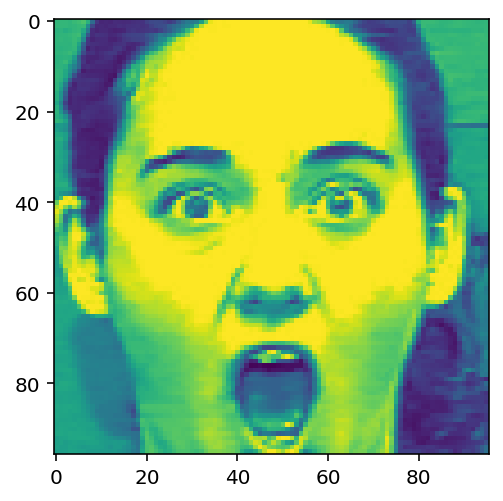

In [0]:
def get_emotion_label(seq_path):
    with open(seq_path, 'r') as file:
        label = int(float(file.read().strip()))
    return label


def extract_face(img_grey):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_grey, 1.1, 4)
    for (x, y, w, h) in faces:
        return img_grey[y:y + h, x:x + w]


def get_preprocessed_img(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_face = extract_face(img_gray)
    img_face = cv2.resize(img_face, IMAGE_SIZE)
    img_face = img_face.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
    return img_face

x_own=[]
for img_path in glob.glob('/content/data/*'):
  x_own.append(get_preprocessed_img(img_path))
 
x_own = np.array(x_own) / 255.
img_tensor =x_own

img = img_tensor[0].reshape(IMAGE_SIZE)
plt.imshow(img, cmap='viridis')
plt.show()

In [0]:
deconv = visualize_all_layers(model, x_own)

(15, 2)
[('input_10', <__main__.DInput object at 0x7feb010acba8>), ('conv2d_25', <__main__.DConvolution2D object at 0x7feb00630f28>), ('conv2d_25_activation', <__main__.DActivation object at 0x7feb00c71c88>), ('max_pooling2d_17', <__main__.DMaxPooling object at 0x7feb011ebba8>), ('conv2d_26', <__main__.DConvolution2D object at 0x7feb00c40048>), ('conv2d_26_activation', <__main__.DActivation object at 0x7feb00c60a90>), ('max_pooling2d_18', <__main__.DMaxPooling object at 0x7feb00c60d30>), ('conv2d_27', <__main__.DConvolution2D object at 0x7feb00c60a20>), ('conv2d_27_activation', <__main__.DActivation object at 0x7feb00b2c710>), ('average_pooling2d_9', <__main__.DAvgPooling object at 0x7feb00b25dd8>), ('flatten_9', <__main__.DFlatten object at 0x7feb00b25eb8>), ('dense_13', <__main__.DDense object at 0x7feb00b2ca20>), ('dense_13_activation', <__main__.DActivation object at 0x7feb00b0cf60>), ('predictions', <__main__.DDense object at 0x7feb010c1b38>), ('predictions_activation', <__main__.

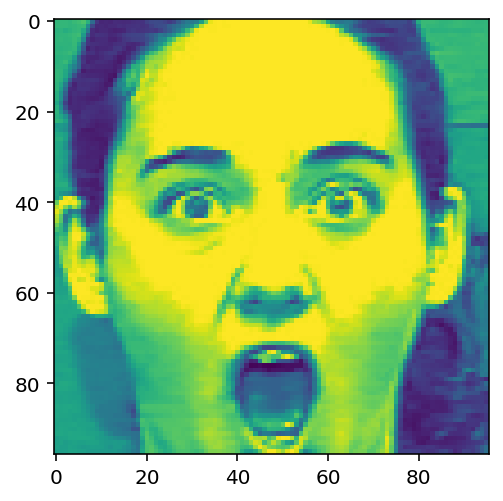

In [0]:
img = img_tensor[0].reshape(IMAGE_SIZE)
plt.imshow(img, cmap='viridis')
plt.show()

In [0]:
for key in deconv.keys():
    print(key)

predictions
dense_12
flatten_8
average_pooling2d_8
conv2d_24
max_pooling2d_16
conv2d_23
max_pooling2d_15
conv2d_22


In [0]:
# 0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise
model.predict(img_tensor)

array([[0.23042801, 0.13495763, 0.045885  , 0.13395517, 0.05335007,
        0.08253657, 0.09811041, 0.22077718]], dtype=float32)

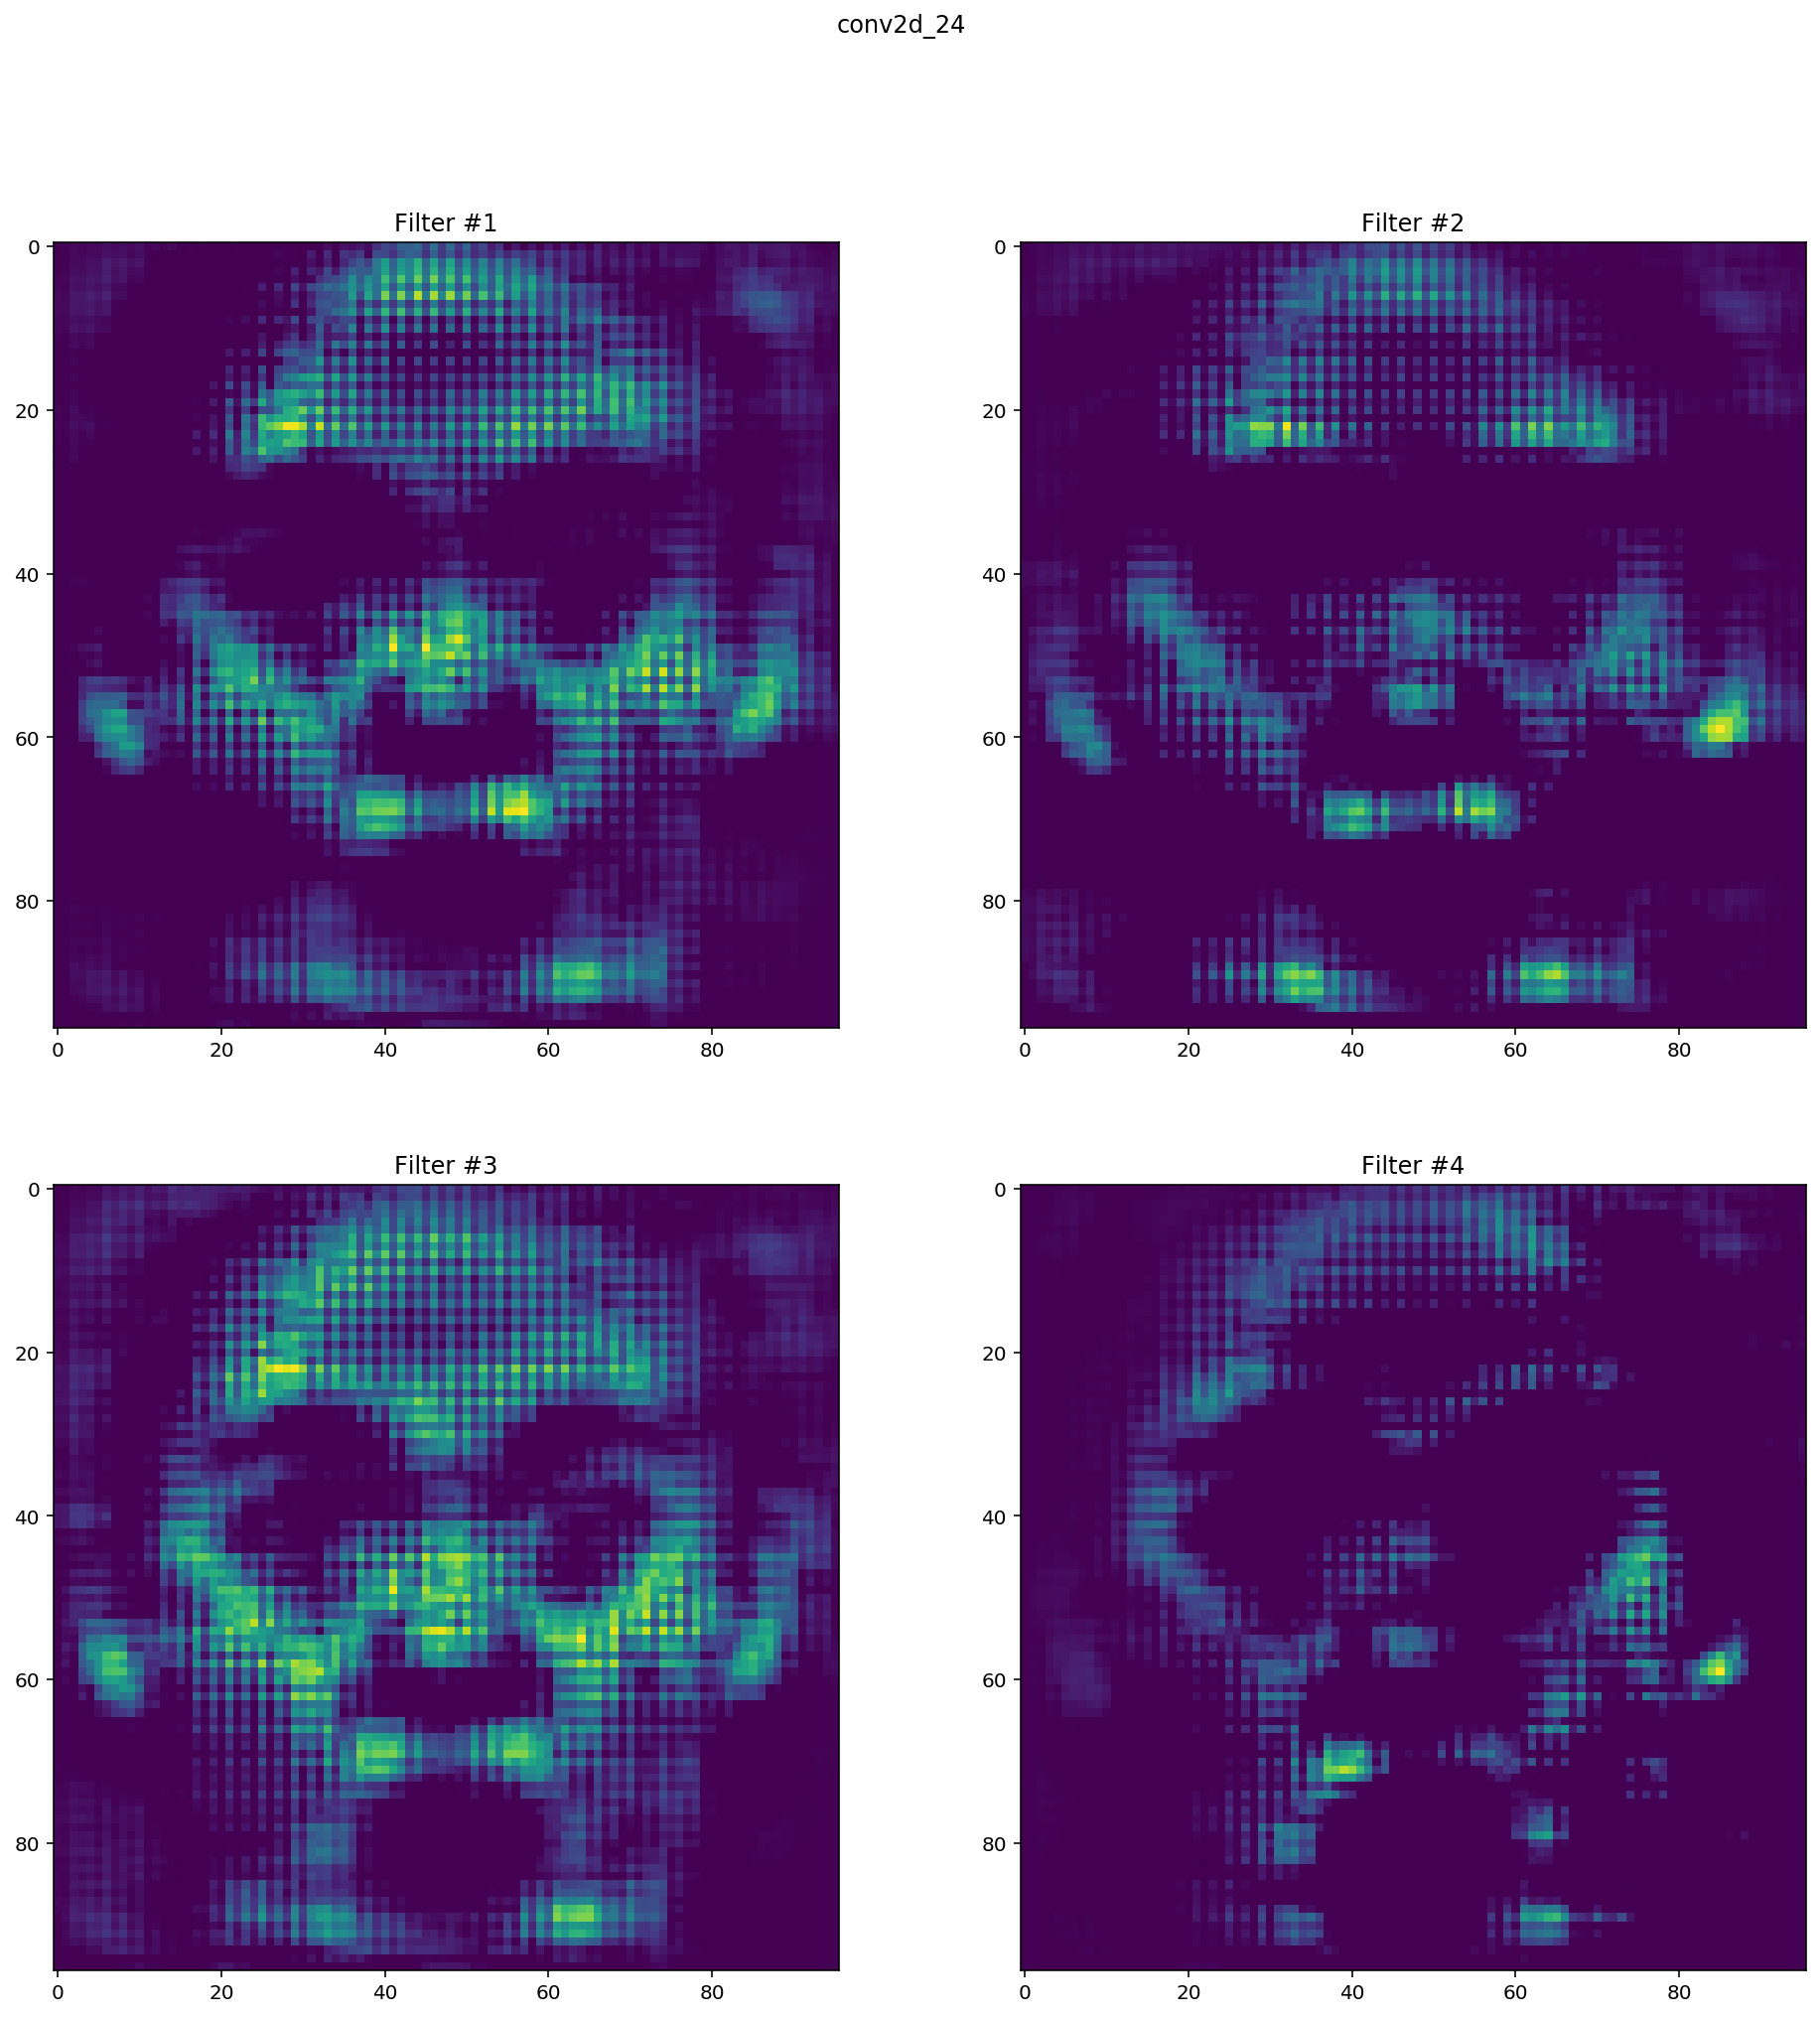

In [0]:
plt.figure(figsize=(16, 16))
layer_name = 'conv2d_24'
plt.suptitle(layer_name)

for i, img in enumerate(deconv[layer_name]):
    plt.subplot(2,2,i+1)
    plt.imshow(img)
    # Use the below commented line for block1 visualizations
    # Since, deprocess_image() is not required for block1 visualizations
    # plt.imshow(img)
    plt.title('Filter #{}'.format(i+1))

## Experiments on model trained on 100 epochs

In [0]:
model = load_model('/content/last_cnn_model (8).h5')
deconv = visualize_all_layers(model, x_own)

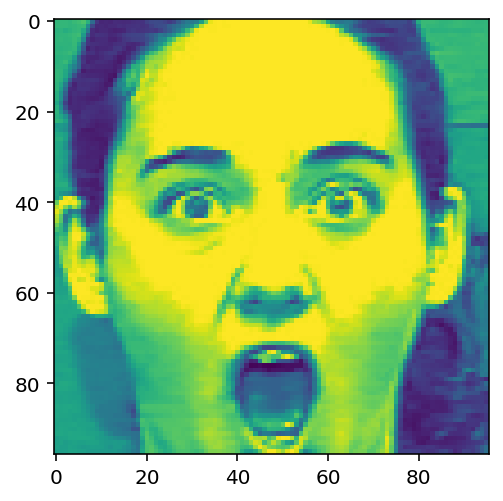

In [0]:
img = img_tensor[0].reshape(IMAGE_SIZE)
plt.imshow(img, cmap='viridis')
plt.show()

In [0]:
for key in deconv.keys():
    print(key)

predictions
dense_13
flatten_9
average_pooling2d_9
conv2d_27
max_pooling2d_18
conv2d_26
max_pooling2d_17
conv2d_25


In [0]:
# 0=neutral, 1=anger, 2=contempt, 3=disgust, 4=fear, 5=happy, 6=sadness, 7=surprise
model.predict(img_tensor)

array([[2.4625003e-21, 8.1879212e-32, 8.7844716e-29, 4.1390386e-30,
        1.5835635e-13, 5.4451550e-35, 1.9862456e-20, 1.0000000e+00]],
      dtype=float32)

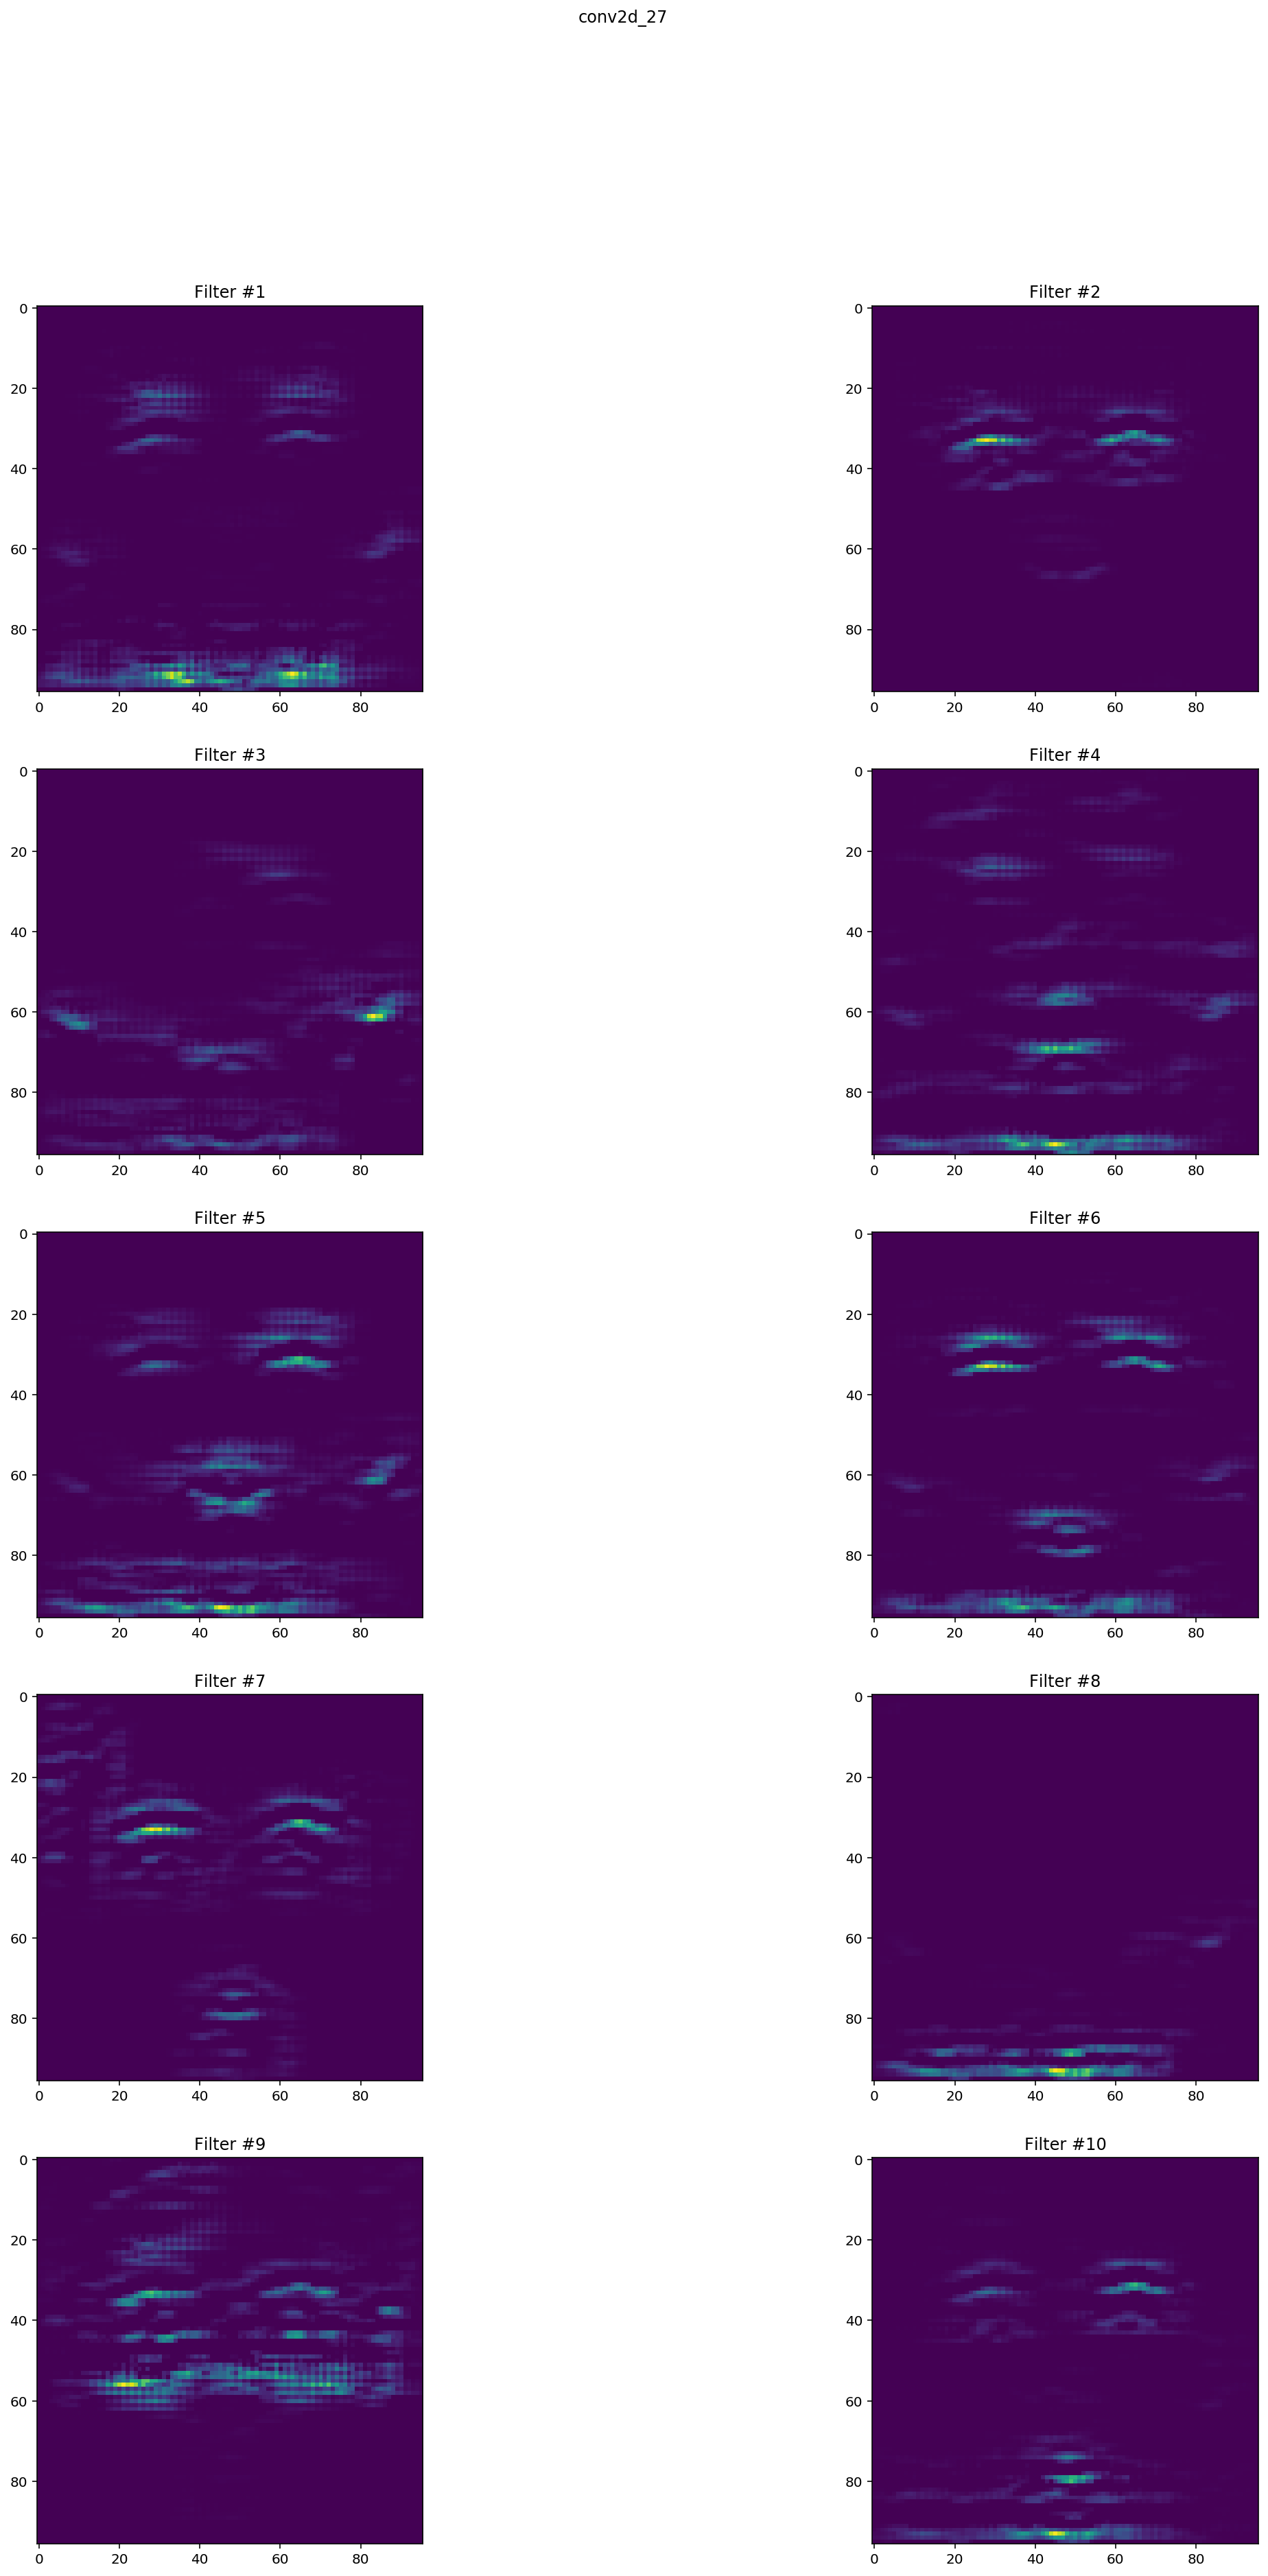

In [0]:
plt.figure(figsize=(20, 30))
layer_name = 'conv2d_27'
plt.suptitle(layer_name)

for i, img in enumerate(deconv[layer_name]):
    plt.subplot(5,2,i+1)
    plt.imshow(img)
    # Use the below commented line for block1 visualizations
    # Since, deprocess_image() is not required for block1 visualizations
    # plt.imshow(img)
    plt.title('Filter #{}'.format(i+1))

## KL Divergence

In [0]:
NUM_SELECTED_FILTERS=10
TARGET_LAYER_NAME='conv2d_27'

In [0]:
def get_facs(seq_path):
    facs=[]
    with open(seq_path, 'r') as file:
        for line in file:
          fac=int(float(line.split()[0]))
          facs.append(fac)
        
    return facs


def extract_face(img_grey):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img_grey, 1.1, 4)
    for (x, y, w, h) in faces:
        return img_grey[y:y + h, x:x + w]


def get_preprocessed_img(image_path):
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_face = extract_face(img_gray)
    img_face = cv2.resize(img_face, IMAGE_SIZE)
    img_face = img_face.reshape((IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
    return img_face

def get_filter_sums(output, num_selected_filters=None):
    if not num_selected_filters:
      num_selected_filters = output.shape[-1]
    filter_sums = np.zeros(num_selected_filters)
    for filter_index in range(num_selected_filters):
        if output.ndim == 2:
            sum_value = np.sum(output[:, filter_index])
        else:
            sum_value = np.sum(output[:, :, :, filter_index])
        filter_sums[filter_index]=sum_value
    return filter_sums


def get_activations(model, data, target_layer_name, last_layer_name='predictions'):
    deconv_layers = []
    # Stack layers
    for layer in model.layers:
        if isinstance(layer, Convolution2D):
            deconv_layers.append((layer.name, DConvolution2D(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, MaxPooling2D):
            deconv_layers.append((layer.name, DMaxPooling(layer)))
        elif isinstance(layer, AvgPool2D):
            deconv_layers.append((layer.name, DAvgPooling(layer)))
        elif isinstance(layer, Dense):
            deconv_layers.append((layer.name, DDense(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, Activation):
            deconv_layers.append((layer.name, DActivation(layer)))
        elif isinstance(layer, Flatten):
            deconv_layers.append((layer.name, DFlatten(layer)))
        elif isinstance(layer, InputLayer):
            deconv_layers.append((layer.name, DInput(layer)))
        else:
            print('Cannot handle this type of layer')
            print(layer.get_config())
            sys.exit()
        if last_layer_name == layer.name:
            break

    # Forward pass
    deconv_layers[0][1].up(data)
    for i in range(1, len(deconv_layers)):
        deconv_layers[i][1].up(deconv_layers[i - 1][1].up_data)

    deconv_list = []
    target_layer_name = [x for x, y in enumerate(deconv_layers) 
                           if y[0] == TARGET_LAYER_NAME][0]
    output = deconv_layers[target_layer_name][1].up_data

    
    return get_filter_sums(output, num_selected_filters=NUM_SELECTED_FILTERS)
    

In [0]:
model = load_model('/content/last_cnn_model (8).h5')
model.summary()














Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 96, 96, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 96, 96, 64)        1664      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 48, 48, 128)       204928    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 256)       819456    
________________

In [0]:
path_to_ck_facs = DATA_DIR + 'FACS/'
path_to_ck_imgs = DATA_DIR + 'cohn-kanade-images/'
img_reprs=[] # contains dict.fromkeys(['x', 'y','activations'])
subjects = listdir(path_to_ck_facs)
# pbar = tqdm(total=len(subjects))
pbar = tqdm(20)
for subject in subjects[:20]:
    pbar.update(1)
    subject_path = path_to_ck_facs + subject + '/'
    for seq in listdir(subject_path):
        seq_path = subject_path + seq + '/'
        facs_files = listdir(seq_path)
        if facs_files:
            img_repr=dict.fromkeys(['x', 'y','activations'])
            img_repr['y']= get_facs(seq_path + facs_files[0])
            imgs_path = path_to_ck_imgs + subject + '/' + seq + '/'
            last_img = listdir(imgs_path)[-1]
            img_repr['x'] = get_preprocessed_img(imgs_path + last_img)
            img_for_model=[]
            img_for_model.append(img_repr['x'])
            img_for_model = np.array(img_for_model) / 255.
            img_repr['activations'] = get_activations(model,img_for_model,TARGET_LAYER_NAME)
            img_reprs.append(img_repr)
pbar.close()
np.savez_compressed('img_reprs.npz',
                    img_reprs)

0it [00:00, ?it/s]

2it [00:21, 10.73s/it]

KeyboardInterrupt: ignored

In [0]:
def find_filters(output,num_selected_filters=NUM_SELECTED_FILTERS):
    filter_sum = []
    for filter_index in range(output.shape[-1]):
        if output.ndim == 2:
            sum_value = np.sum(output[:, filter_index])
        else:
            sum_value = np.sum(output[:, :, :, filter_index])
        filter_sum.append((filter_index, sum_value))
    return filter_sum[:num_selected_filters]

def visualize_all_layers(model, data, layer_name='predictions', visualize_mode='all'):
    '''
    function to visualize feature
    # Arguments
        model: Pre-trained model used to visualize data
        data: image to visualize
        layer_name: Name of layer to visualize
        feature_to_visualize: Features to visualize
        visualize_mode: Visualize mode, 'all' or 'max', 'max' will only pick 
                        the greates activation in a feature map and set others
                        to 0s, this will indicate which part fire the neuron 
                        most; 'all' will use all values in a feature map,
                        which will show what image the filter sees. For 
                        convolutional layers, There is difference between 
                        'all' and 'max', for Dense layer, they are the same
    # Returns
        The image reflecting feature
    '''
    deconv_layers = []
    # Stack layers
    for layer in model.layers:
        if isinstance(layer, Convolution2D):
            deconv_layers.append((layer.name, DConvolution2D(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, MaxPooling2D):
            deconv_layers.append((layer.name, DMaxPooling(layer)))
        elif isinstance(layer, AvgPool2D):
            deconv_layers.append((layer.name, DAvgPooling(layer)))
        elif isinstance(layer, Dense):
            deconv_layers.append((layer.name, DDense(layer)))
            deconv_layers.append((layer.name + '_activation', DActivation(layer)))
        elif isinstance(layer, Activation):
            deconv_layers.append((layer.name, DActivation(layer)))
        elif isinstance(layer, Flatten):
            deconv_layers.append((layer.name, DFlatten(layer)))
        elif isinstance(layer, InputLayer):
            deconv_layers.append((layer.name, DInput(layer)))
        else:
            print('Cannot handle this type of layer')
            print(layer.get_config())
            sys.exit()
        if layer_name == layer.name:
            break

    print(np.asarray(deconv_layers).shape)
    print(deconv_layers)
    # Forward pass
    deconv_layers[0][1].up(data)
    for i in range(1, len(deconv_layers)):
        print(deconv_layers[i][1])
        deconv_layers[i][1].up(deconv_layers[i - 1][1].up_data)
        
    # Selecting layers to visualize
    layers_to_visualize = []
    model_layers = set([layer.name for layer in model.layers])
    layers_to_visualize = [x for x, y in enumerate(deconv_layers) 
                           if y[0] in model_layers]
    layers_to_visualize.reverse()
    # Removing the input layer
    layers_to_visualize.pop()
    # print('layers_to_visualize:', layers_to_visualize)
    
    deconv_dict = dict()
    for i in layers_to_visualize:
        deconv_list = []
        output = deconv_layers[i][1].up_data
        top_filters = find_filters(output)
        # print('output.shape :', output.shape)
        # print('deconv_layer:', deconv_layers[i][0])
        # print('top_filters:', top_filters)
        for feature_to_visualize, sum_value in top_filters:
            assert output.ndim == 2 or output.ndim == 4
            if output.ndim == 2:
                feature_map = output[:, feature_to_visualize]
            else:
                feature_map = output[:, :, :, feature_to_visualize]
            if 'max' == visualize_mode:
                max_activation = feature_map.max()
                temp = feature_map == max_activation
                feature_map = feature_map * temp
            elif 'all' != visualize_mode:
                print('Illegal visualize mode')
                sys.exit()
            output_temp = np.zeros_like(output)
            if 2 == output.ndim:
                output_temp[:, feature_to_visualize] = feature_map
            else:
                output_temp[:, :, :, feature_to_visualize] = feature_map

            # Backward pass
            deconv_layers[i][1].down(output_temp)
            for j in range(i - 1, -1, -1):
                deconv_layers[j][1].down(deconv_layers[j + 1][1].down_data)
            deconv = deconv_layers[0][1].down_data
            deconv = deconv.squeeze()
            deconv_list.append(deconv)
        deconv_dict[deconv_layers[i][0]] = deconv_list
    
    return deconv_dict

In [0]:
def stich_deconv_filters_with_imgs(deconv_filters_with_imgs, layer_name):
    img_width = 96
    img_height = 96

    # build a black picture with enough space for
    # our 8 x 8 filters of size 128 x 128, with a 5px margin in between
    margin = 5
    width = num_imgs_per_filter * img_width + (num_imgs_per_filter - 1) * margin
    height = num_selected_filters * img_height + (num_selected_filters - 1) * margin
    stitched_filters = np.ones((height, width))

    # fill the picture with our saved filters
    for r in range(num_selected_filters):
        for c in range(num_imgs_per_filter):
            img = deconv_filters_with_imgs[r][c]
            width_margin = (img_width + margin) * c
            height_margin = (img_height + margin) * r
            stitched_filters[
                height_margin: height_margin + img_height,
                width_margin: width_margin + img_width] = img

    # save the result to disk
    plt.imsave(FIGURES_DIR+'stitched_deconv_filters_with_imgs.png', stitched_filters.reshape((width,height)),cmap='viridis')
    # plt.imshow(img)
    # plt.show()

In [0]:
num_selected_filters = NUM_SELECTED_FILTERS
num_imgs_per_filter = 10

def sortSecond(val): 
    return val[1] 
        
data = np.load('img_reprs.npz',allow_pickle=True)
img_reprs = data['arr_0']
idxs_max_activation = np.zeros((num_selected_filters,num_imgs_per_filter),dtype=np.int)
img_activations = np.asarray([img_repr['activations'] for img_repr in img_reprs])
print(img_activations.shape)
for filter_idx in range(num_selected_filters):
  sorted_idxs_with_activation=sorted(list(enumerate(img_activations[:,filter_idx])), key=lambda x: x[1],reverse=True)
  print(sorted_idxs_with_activation)
  idxs_max_activation[filter_idx]=[i for i,activation in sorted_idxs_with_activation[:num_imgs_per_filter]]
deconv_filters_with_imgs=[]
pbar = tqdm(total=num_selected_filters*num_imgs_per_filter)
for filter_idx in range(num_selected_filters):
  filters_with_imgs = [img_reprs[idx_img]['x'] for idx_img in idxs_max_activation[filter_idx]]
  deconv_filter_with_imgs=[]
  for img in filters_with_imgs:
    pbar.update(1)
    deconv = visualize_all_layers(model, img.reshape((1,96,96,1))/255.)
    deconv_filter_with_imgs.append(deconv[TARGET_LAYER_NAME][filter_idx])
  deconv_filters_with_imgs.append(deconv_filter_with_imgs)
pbar.close()
np.savez_compressed('deconv_filters_with_imgs.npz',
                    deconv_filters_with_imgs)
stich_deconv_filters_with_imgs(deconv_filters_with_imgs,TARGET_LAYER_NAME)


  0%|          | 0/100 [00:00<?, ?it/s]

(94, 10)
[(92, 385.30816650390625), (32, 315.7788391113281), (63, 301.7252197265625), (88, 292.9493408203125), (5, 289.80035400390625), (38, 287.90203857421875), (75, 281.4368896484375), (7, 275.10302734375), (33, 271.0330505371094), (10, 269.764404296875), (77, 268.0020446777344), (64, 266.36651611328125), (61, 264.50750732421875), (36, 264.1582336425781), (19, 256.9664001464844), (59, 253.15074157714844), (18, 248.73095703125), (31, 247.51914978027344), (8, 246.9489288330078), (34, 243.45620727539062), (62, 243.40676879882812), (17, 242.58180236816406), (35, 239.7024688720703), (78, 233.09210205078125), (12, 232.94583129882812), (79, 232.93650817871094), (15, 231.21482849121094), (70, 227.90098571777344), (60, 226.13946533203125), (6, 225.8681640625), (72, 225.36497497558594), (76, 224.6136474609375), (11, 221.80093383789062), (9, 209.86065673828125), (14, 207.22842407226562), (74, 206.84950256347656), (13, 204.77047729492188), (57, 197.40939331054688), (69, 190.66726684570312), (56,

KeyboardInterrupt: ignored

In [0]:
# stich_deconv_filters_with_imgs(deconv_filters_with_imgs,TARGET_LAYER_NAME)
print(np.asarray(deconv_filters_with_imgs).shape)
stich_deconv_filters_with_imgs(deconv_filters_with_imgs,TARGET_LAYER_NAME)

(0,)


IndexError: ignored

In [0]:
from sklearn.neighbors import KernelDensity
from scipy.stats import entropy
 
def get_probabilities(values):
  model = KernelDensity(bandwidth=2, kernel='gaussian')
  model.fit(values)
  probabilities = model.score_samples(values)
  probabilities = exp(probabilities)

  return probabilities

kl_bars_data=[]
idxs_max_activation = np.zeros((num_selected_filters,num_imgs_per_filter),dtype=np.int)
img_activations = np.asarray([img_repr['activations'] for img_repr in img_reprs])
print(img_activations.shape)
for filter_idx in range(num_selected_filters):
  kl_dist=[]
  for fau in range(1,28):
    s_with_fau=[img_repr['activations'][filter_idx] for img_repr in img_reprs if (fau in img_repr['y'])]
    s_without_fau=[img_repr['activations'][filter_idx] for img_repr in img_reprs if (fau not in img_repr['y'])]
    q=get_probabilities(s_with_fau)
    r=get_probabilities(s_without_fau)
    kl=entropy(q, qk=r)
    kl_dist.append(kl)
  kl_bars_data.append(kl_dist)

for kl_bar_data in kl_bars_data:
  names = range(1,28)
  values = kl_bar_data

  fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
  axs[0].bar(names, values)
  fig.suptitle('KL divergence')
  plt.show()

(94, 10)


ValueError: ignored